In [1]:
from PIL import Image
import os
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import scipy

In [2]:
import os
path = './all/'
count = 0
for root,dirs,files in os.walk(path):
      for each in files:
          if each.endswith('png'):
             count += 1
print ("圖片數量：",count)

圖片數量： 54415


In [3]:
from sklearn.cluster import DBSCAN

In [4]:
def img_pre(img):
    img = img[ : , : , (2, 1, 0)]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if((img[i][j][2]!=0) and (img[i][j][0]==0) and (img[i][j][1]==0)):
                img[i][j][2]=255
            if((img[i][j][0]!=0) and (img[i][j][1]==0) and (img[i][j][2]==0)):
                img[i][j][0]=255
            if((img[i][j][0]==img[i][j][1]) and (img[i][j][1]==img[i][j][2]) and (img[i][j][0]!=0)):
                img[i][j][0]=255;img[i][j][1]=255;img[i][j][2]=255      

            if(img[i][j][2]>img[i][j][1]):
                if(img[i][j][2]>img[i][j][0]):
                    img[i][j][1]=0;img[i][j][0]=0;img[i][j][2]=255
            if(img[i][j][0]>img[i][j][1]):
                if(img[i][j][0]>img[i][j][2]):
                    img[i][j][1]=0;img[i][j][2]=0;img[i][j][0]=255
    return img

In [5]:
def coor(imgp):
    coor=[]
    for i in range(imgp.shape[0]):
        for j in range(imgp.shape[1]):
            if((imgp[i][j][0]==255) and (imgp[i][j][1]==255) and (imgp[i][j][2]==255)):
                coor.append([j,i])
            if((imgp[i][j][0]==0) and (imgp[i][j][1]==0) and (imgp[i][j][2]==255)): #保留地表基線(藍線)
                coor.append([j,i])
    return(np.array(coor))

{0}


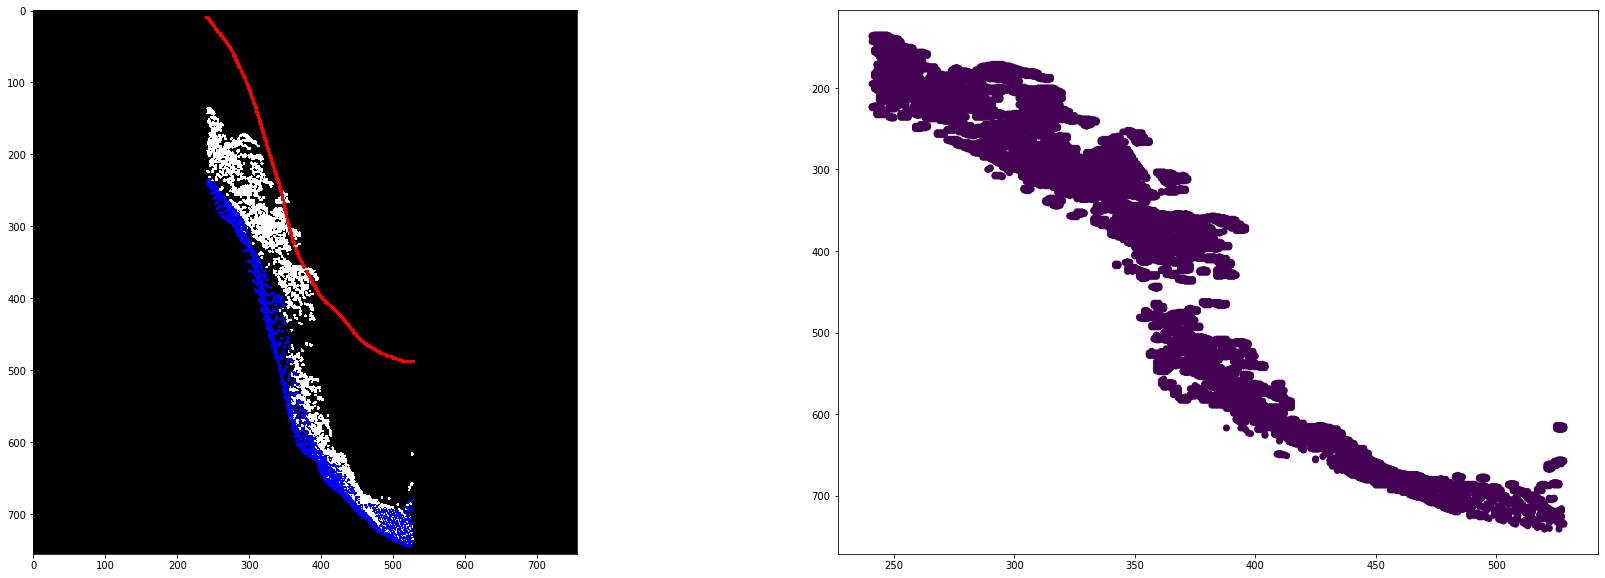

In [6]:
from sklearn.cluster import DBSCAN
file='9621-1-006_001.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0, 1}


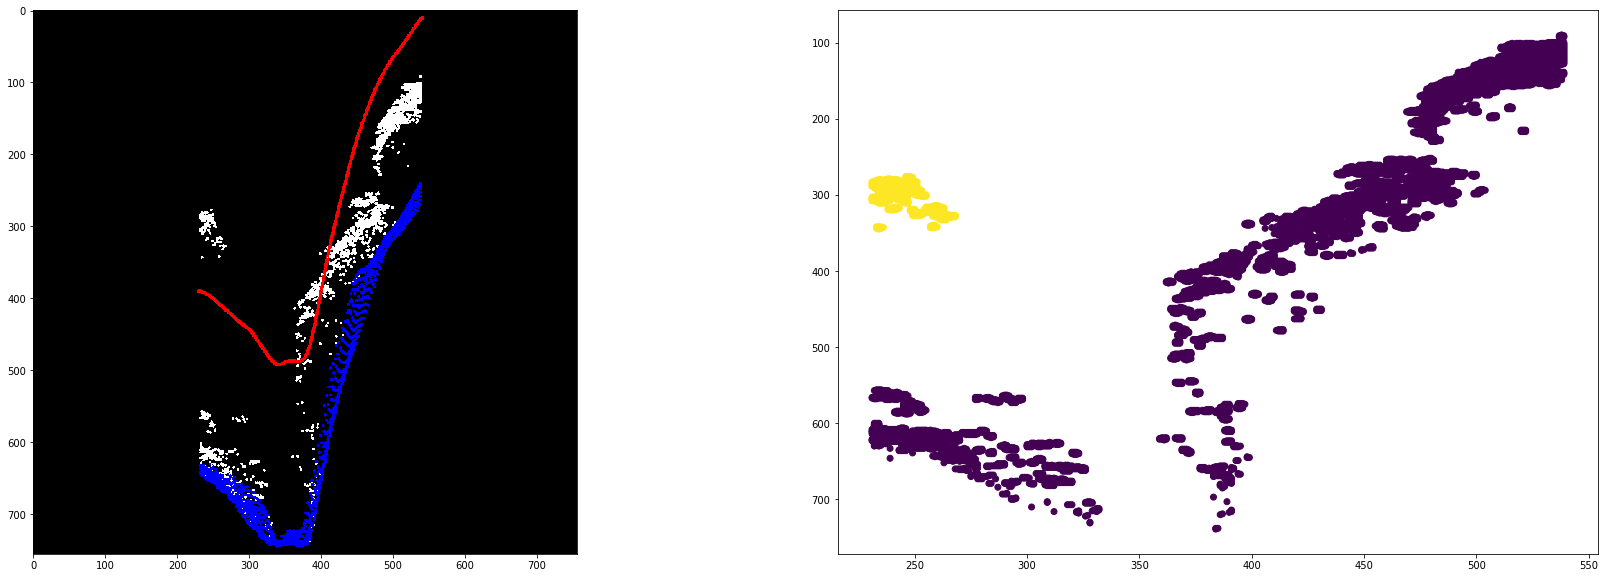

In [9]:
from sklearn.cluster import DBSCAN
file='9621-1-006_018.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0}


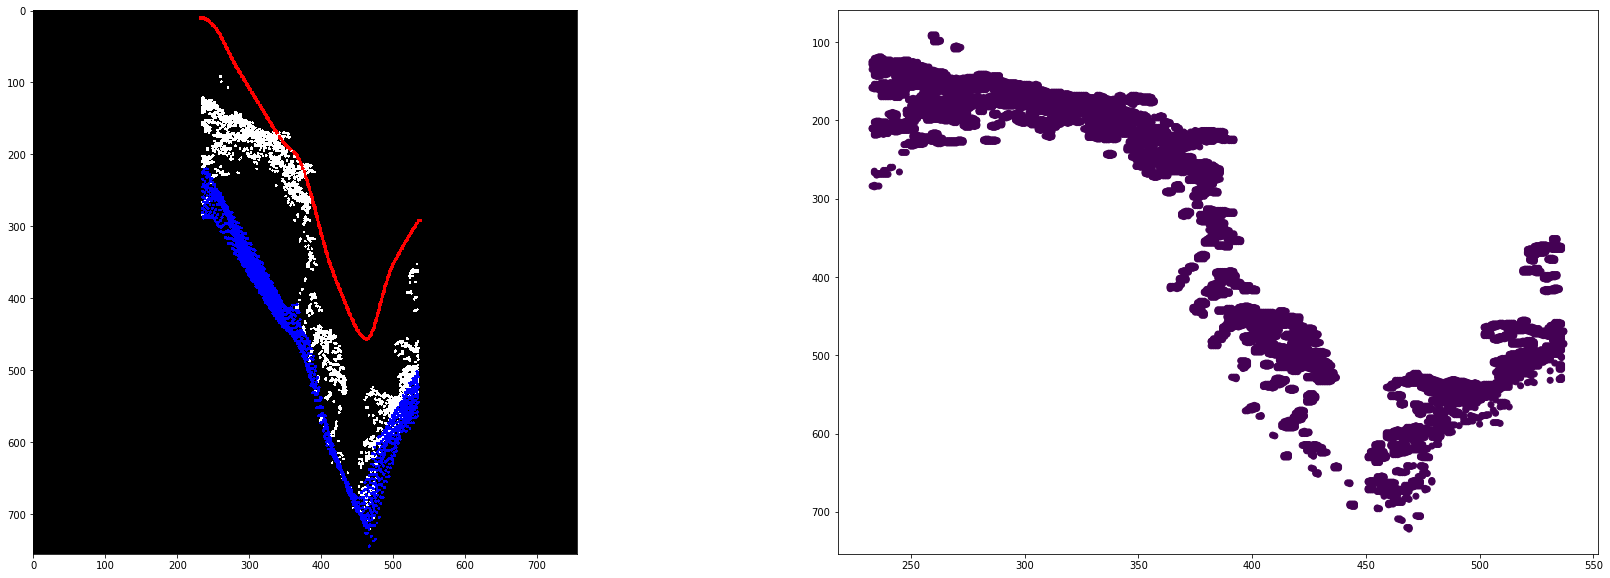

In [10]:
from sklearn.cluster import DBSCAN
file='9621-1-006_017.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0, 1}


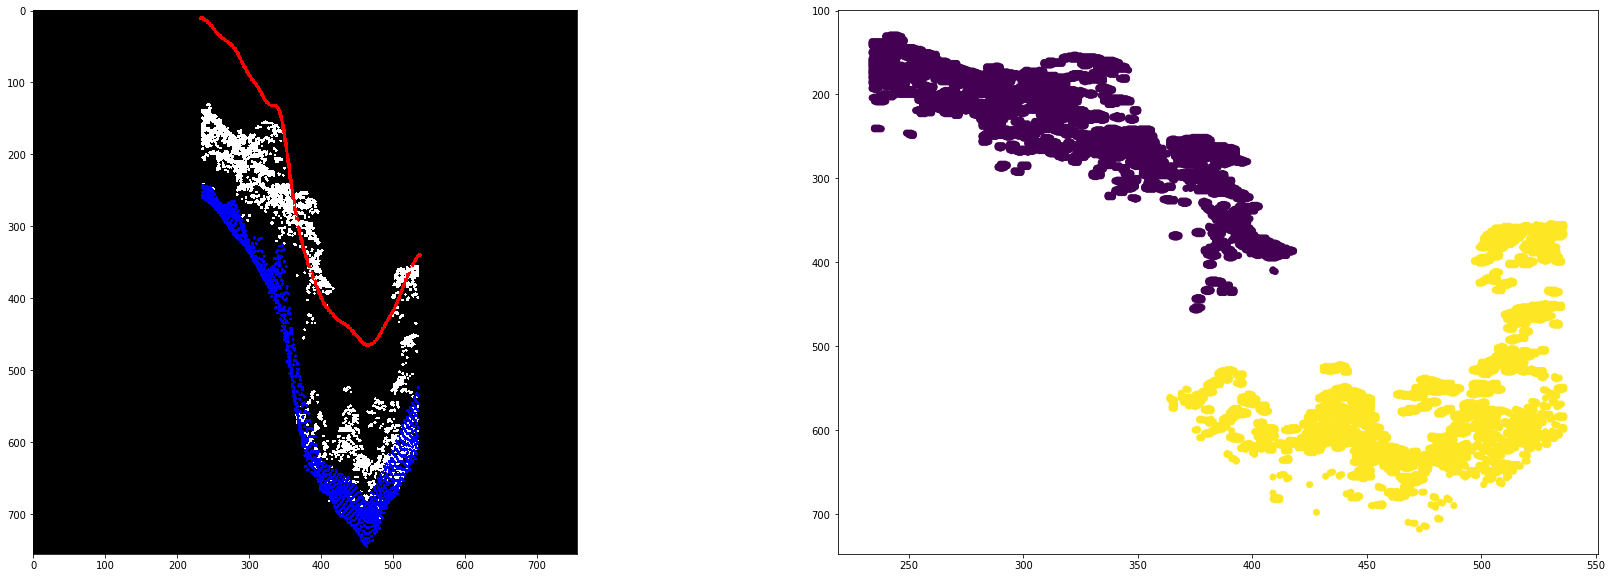

In [11]:
from sklearn.cluster import DBSCAN
file='9621-1-006_022.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0}


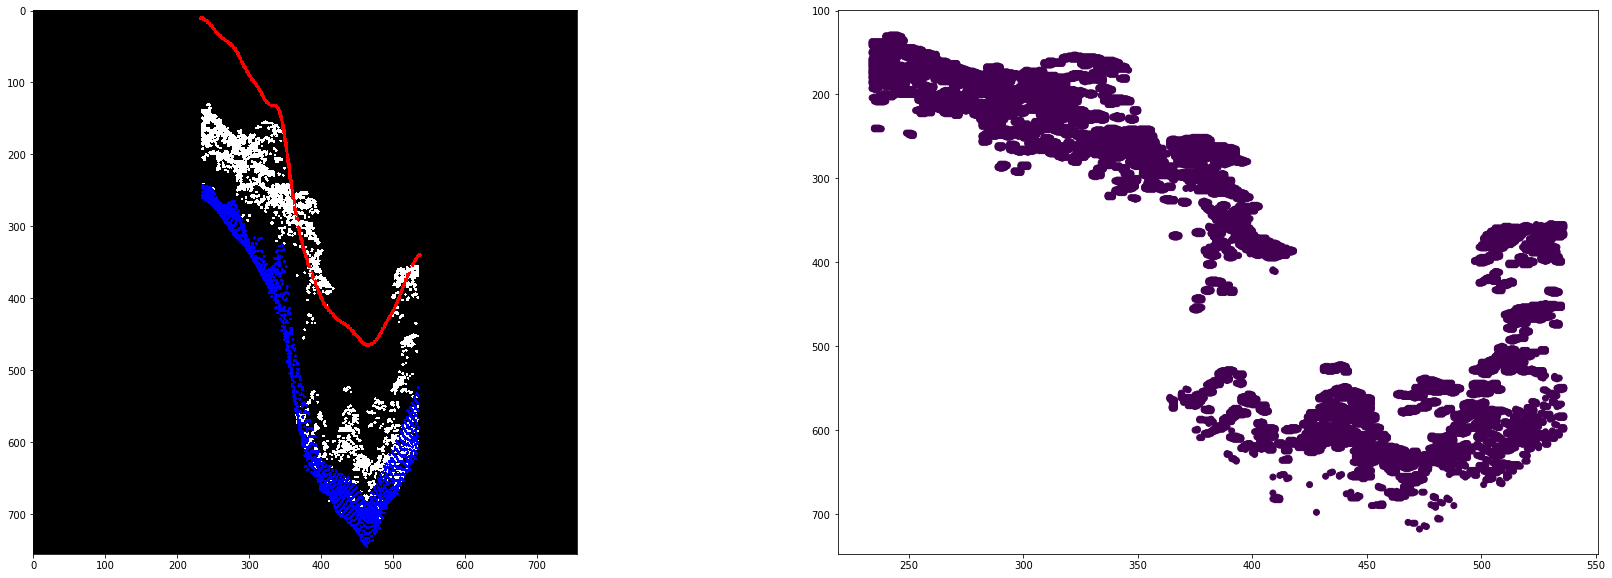

In [12]:
from sklearn.cluster import DBSCAN
file='9621-1-006_022.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 74).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

## DBSCAN test result:
* 拉大eps, 雖然會改善地表分割問題, 但是有可能將天空的電纜與地表錯誤grouping
* 改善: 加入地表基線, 將2團地表串聯在一起, 在降低eps

{0}


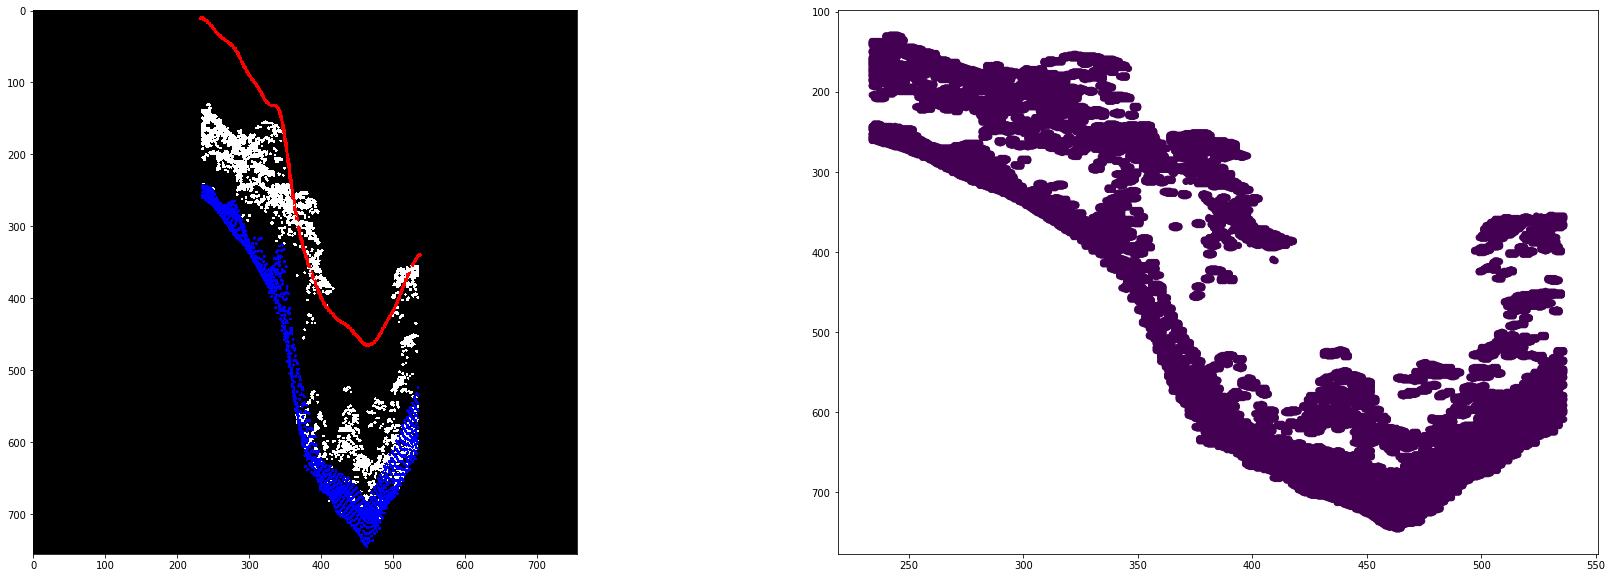

In [14]:
from sklearn.cluster import DBSCAN
file='9621-1-006_022.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0, 1}


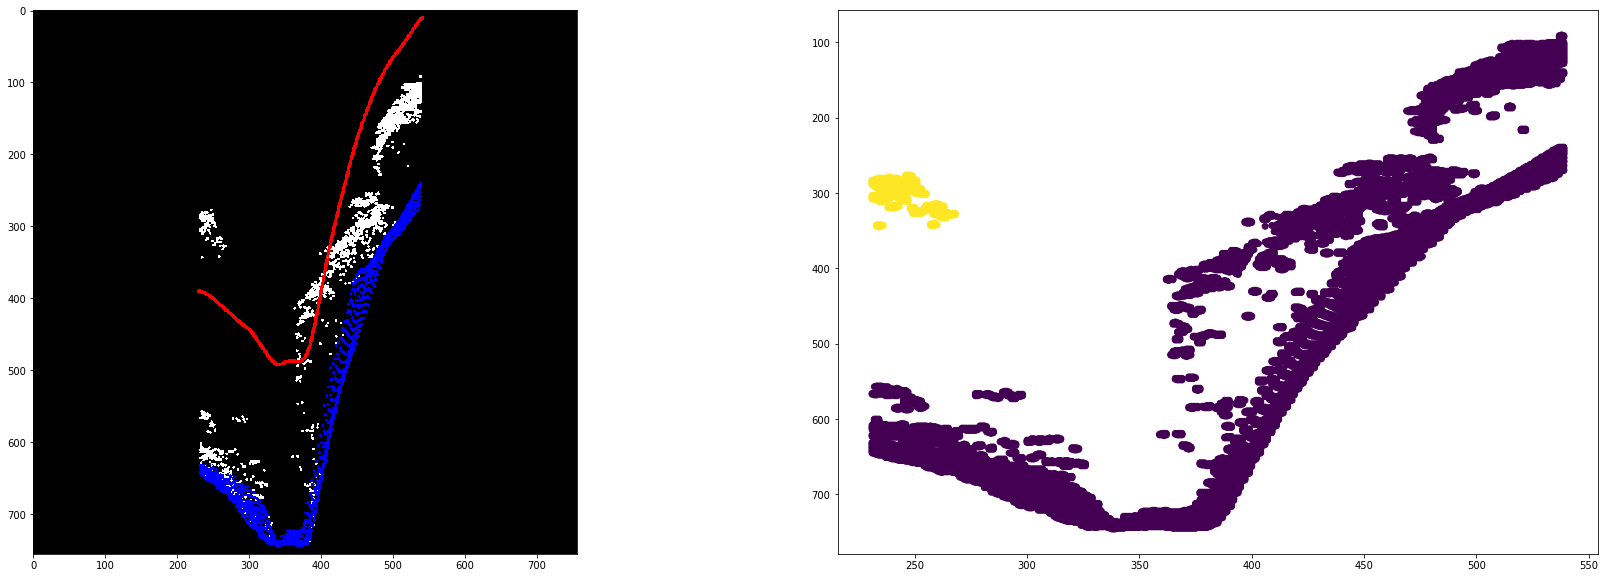

In [15]:
from sklearn.cluster import DBSCAN
file='9621-1-006_018.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0, 1}


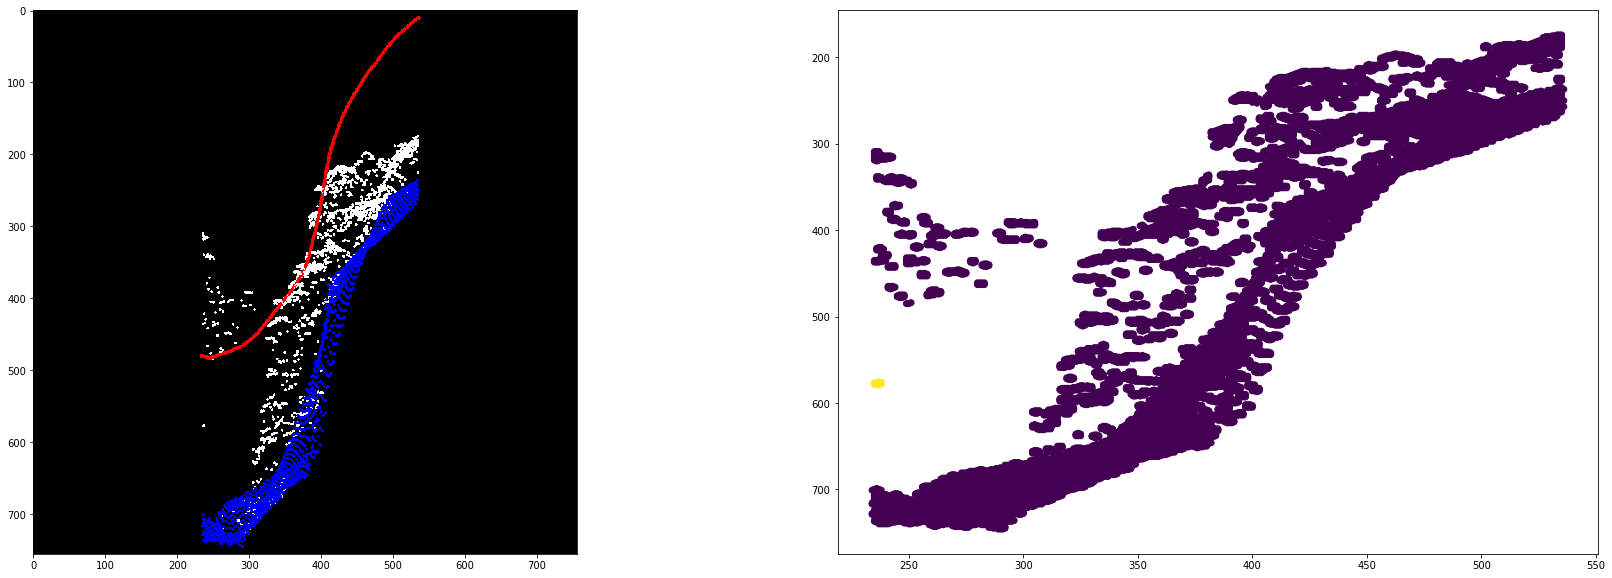

In [16]:
file='9621-1-006_052.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

#### 但是以上脫離地表基線, 疑似樹團的照片會被誤分成2群, 但是該團沒有地表基線, 也無法判斷

{0, 1}


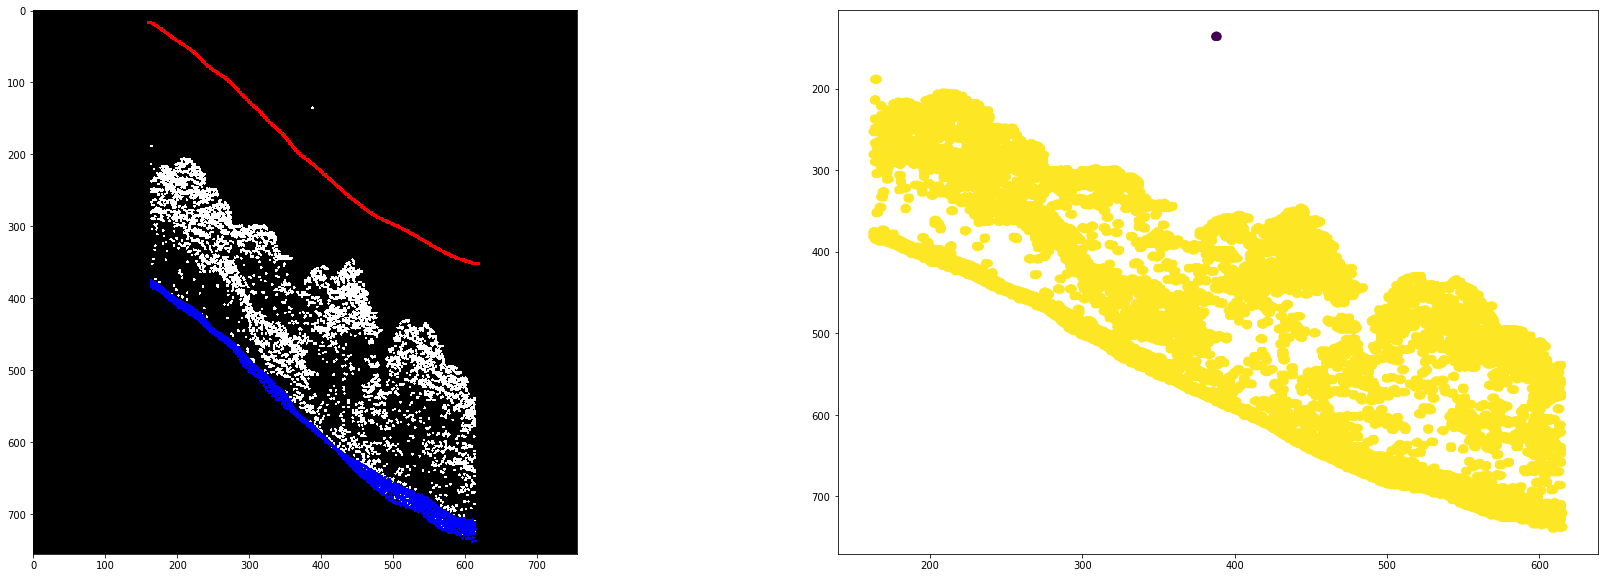

In [17]:
# 同編號其他圖都沒有這個懸空的一點, 可能是一隻鳥飛過
file='9621-1-059_003.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0, 1}


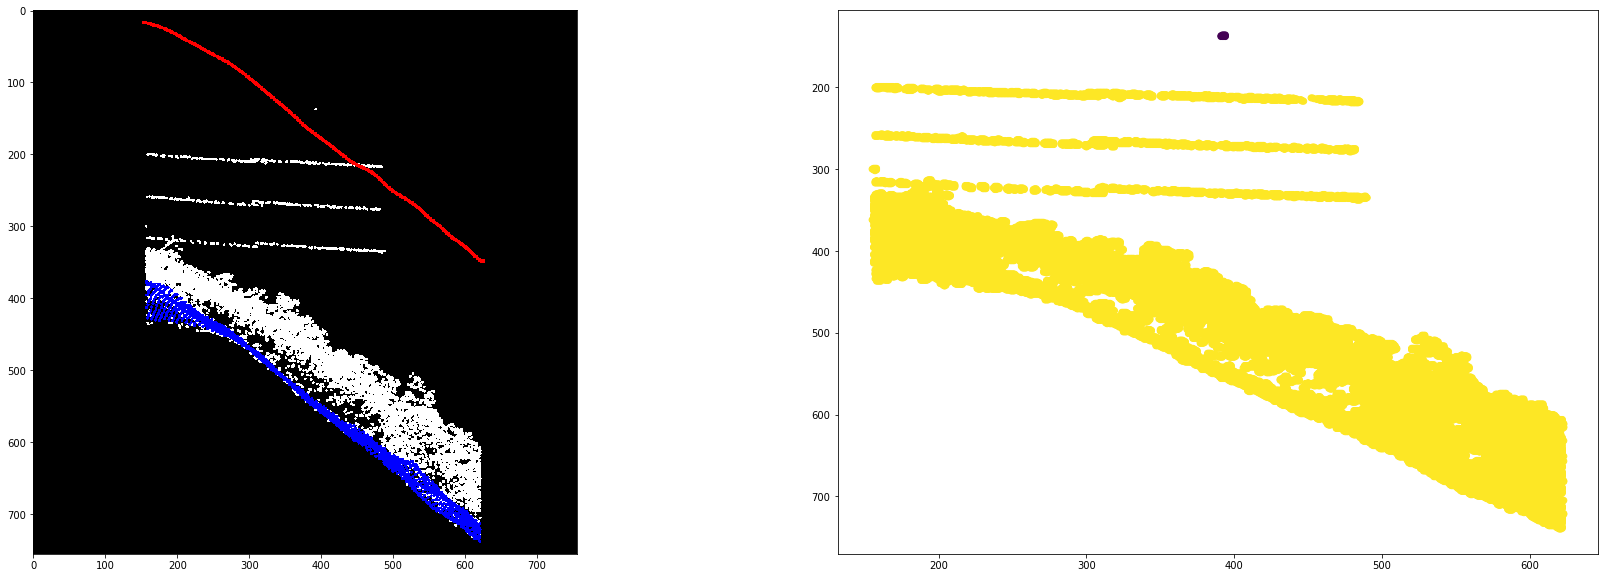

In [18]:
# 電纜貼地, 但是懸空一點而分成2群
file='9622-1-065_009.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0, 1}


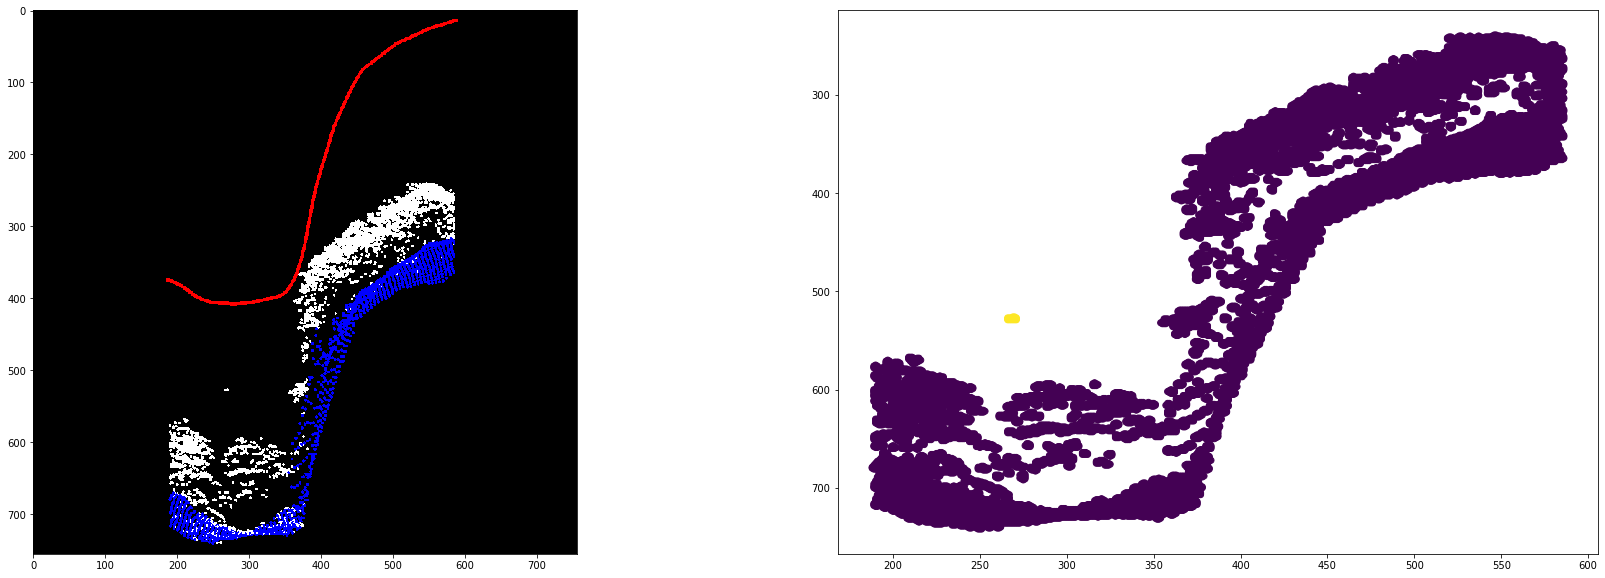

In [19]:
file='9622-1-094_001.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

#### 以上懸空點, 可能是一隻鳥飛過

{0, 1}


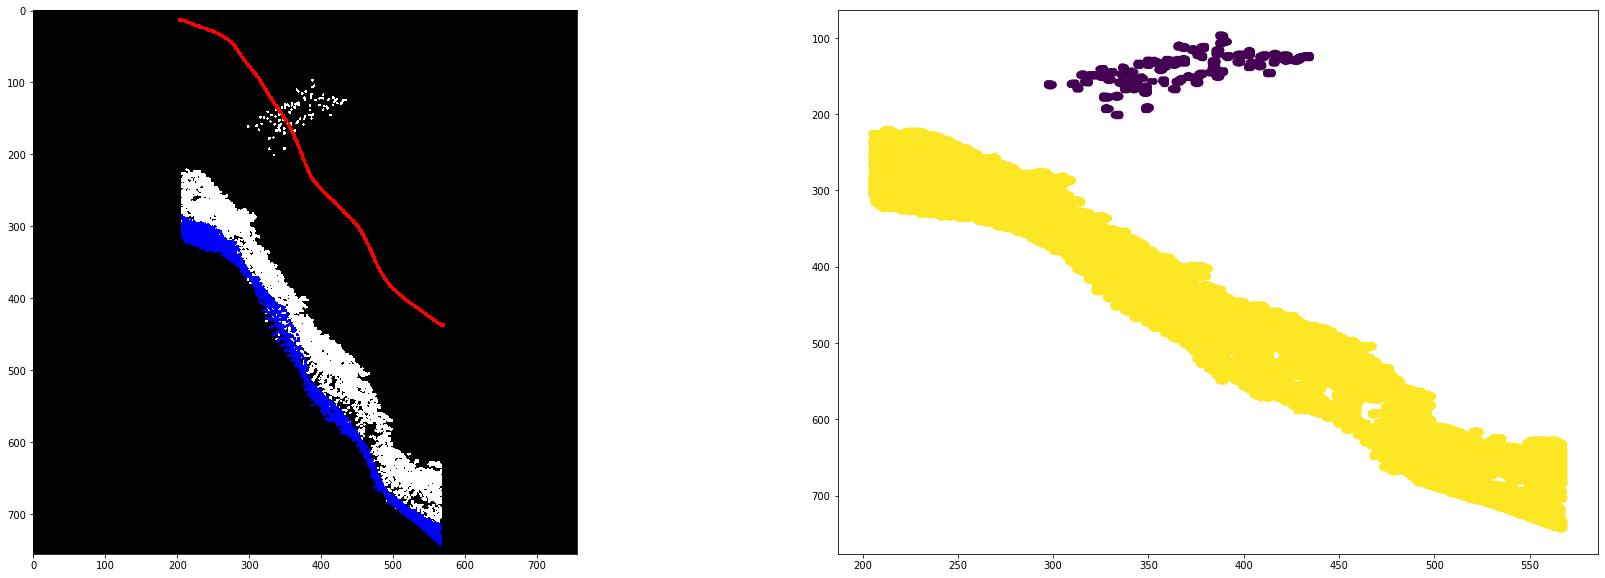

In [21]:
# 9622-2-002_004~006 疑似一群鴿子
file='9622-2-002_004.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

#### 以上疑似一群鴿子

{0, 1, 2}


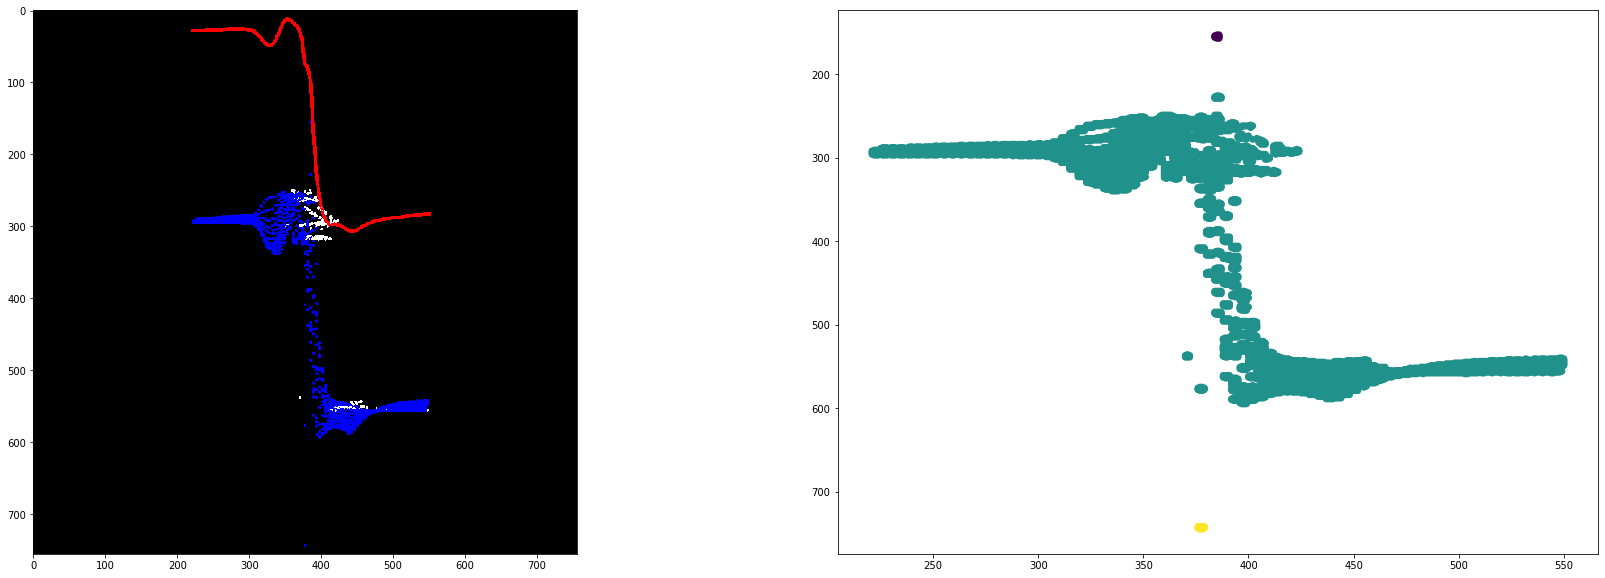

In [23]:
# 9622-2-004_013~18 基準線異常
# 基準線異常分離
file='9622-2-004_017.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

#### 以上基準線異常

{0}


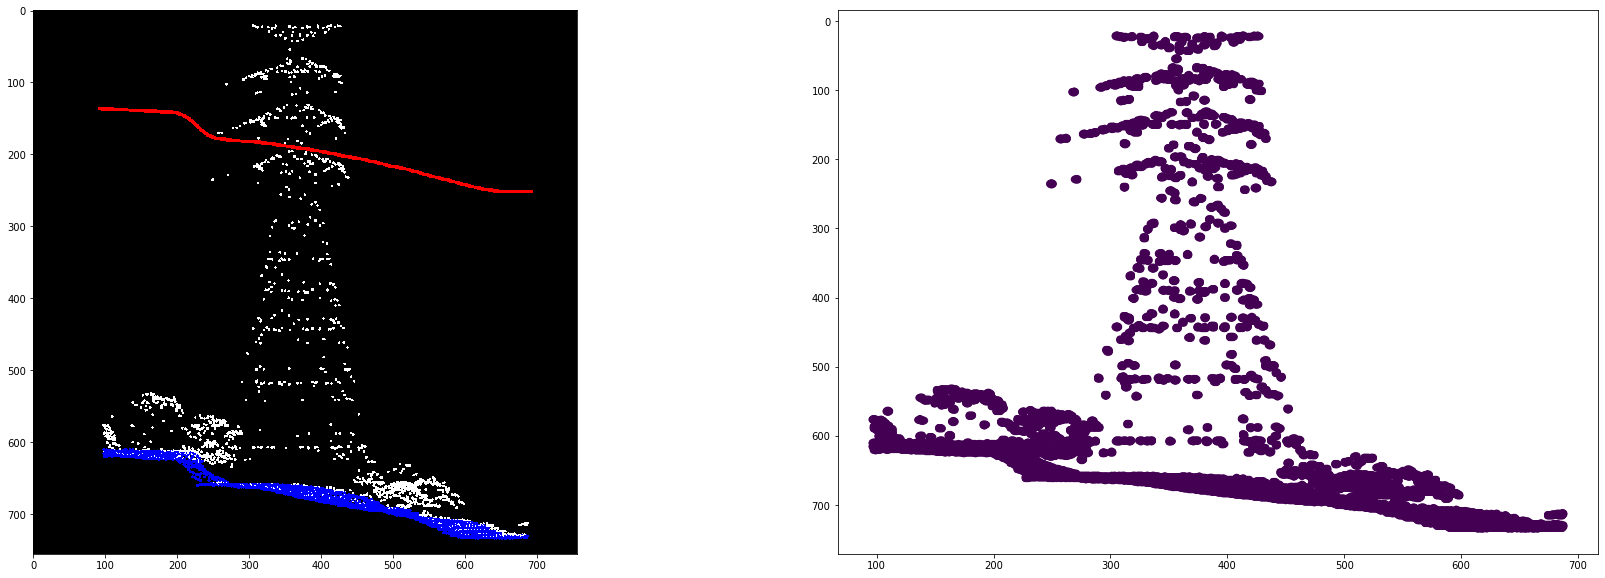

In [25]:
from sklearn.cluster import DBSCAN
file='9418-1-035_005.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0}


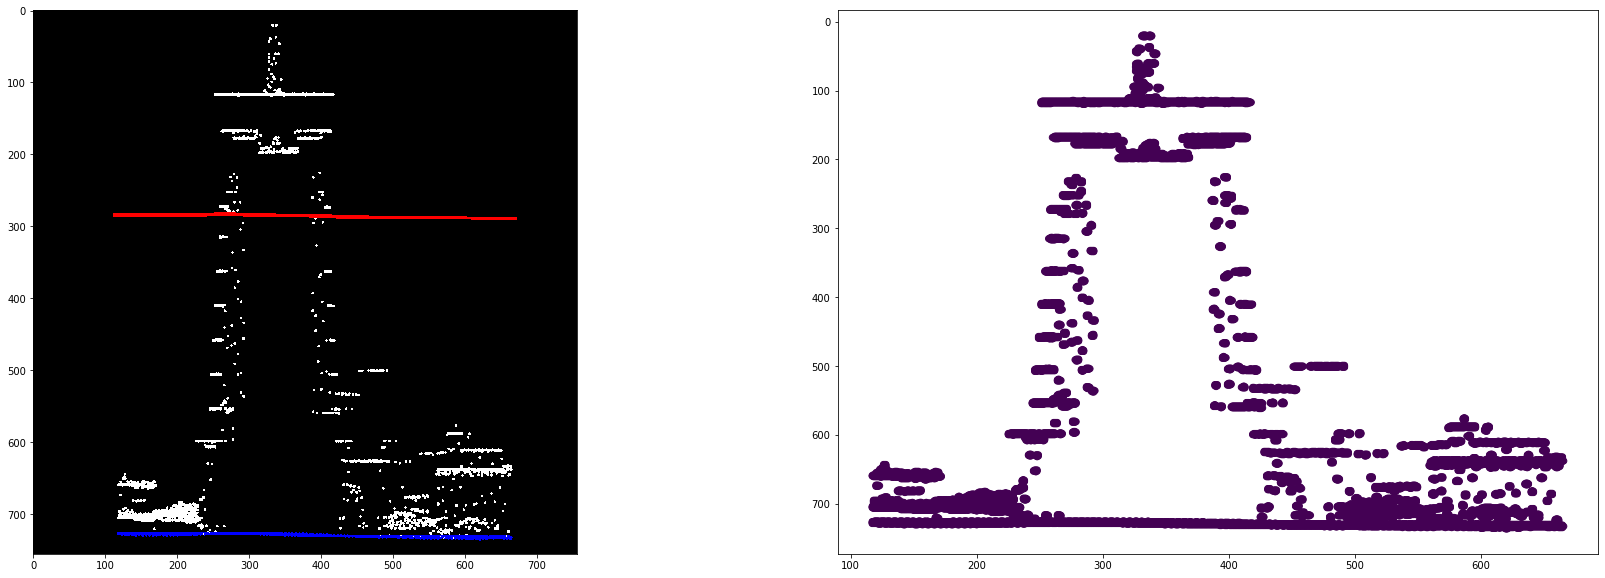

In [26]:
file='9520-1-019_001.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0}


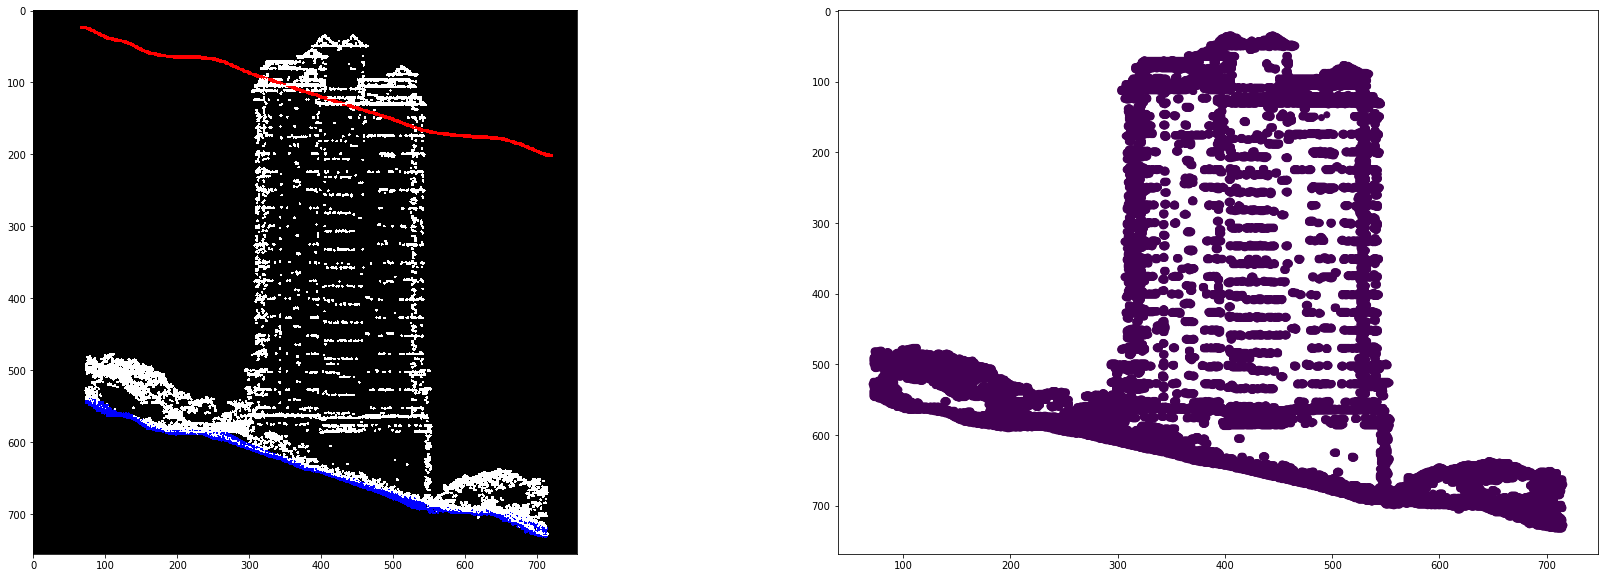

In [27]:
file='9622-1-030_004.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

{0}


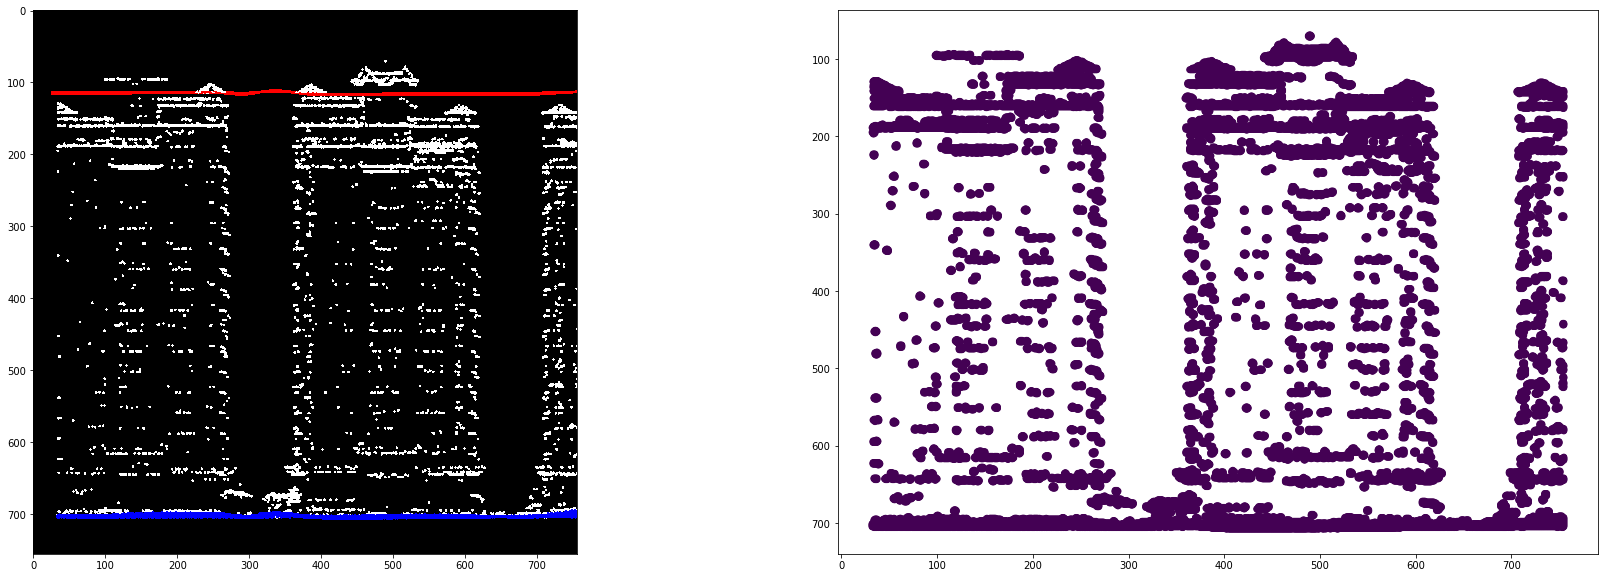

In [28]:
file='9622-1-030_021.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

#### 以上電塔等連續性人工建築 會被誤算進來

{0}


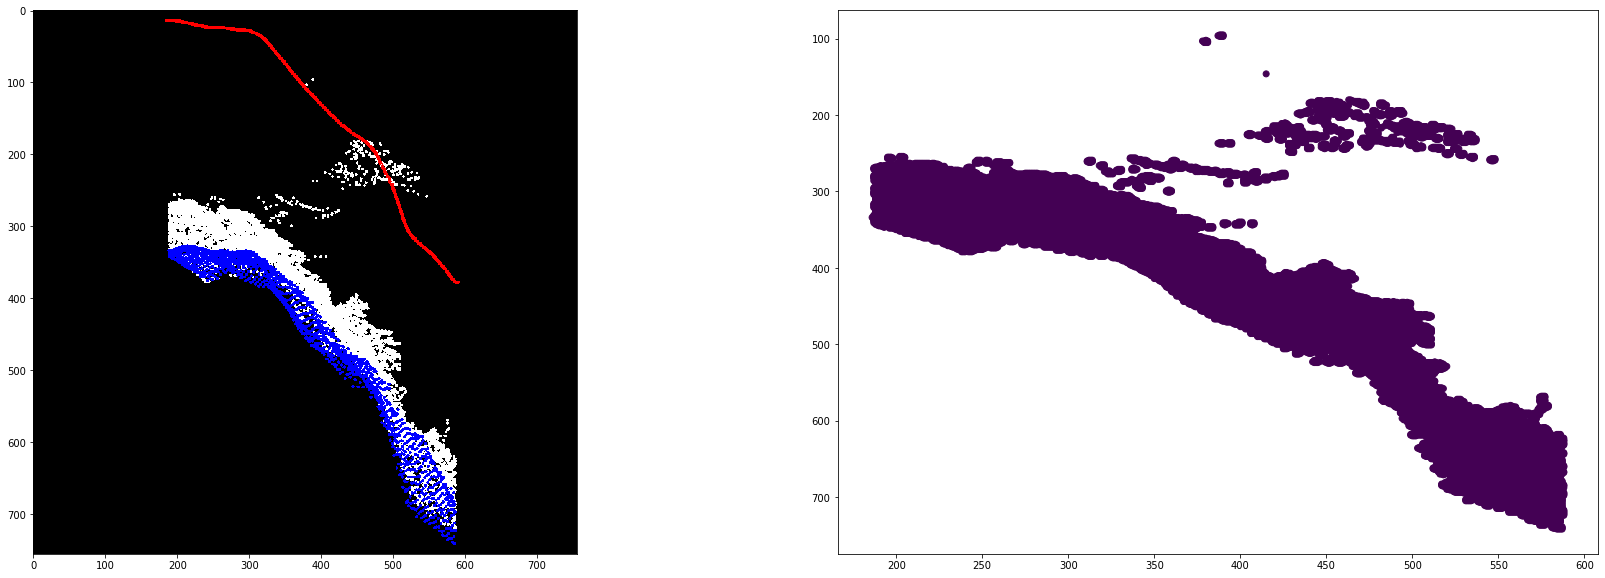

In [29]:
# 9622-2-029_019~44 空中不明一群物體 (無基準線, 顧慮調ok)
file='9622-2-029_019.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

#### 以上空中不明一群物體 (無基準線, 顧慮調ok)

{0}


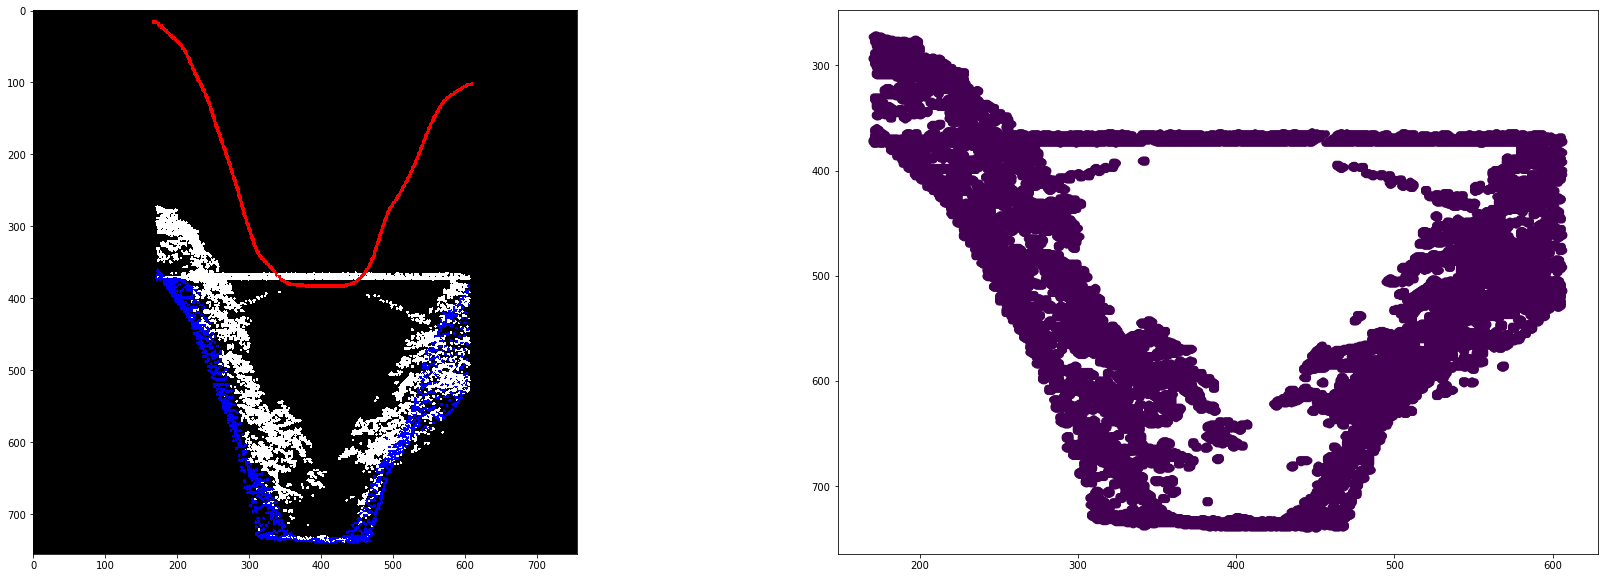

In [30]:
file='9622-2-026_015.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

#### 以上被橋梁連續性建築 誤算進來

{0, 1}


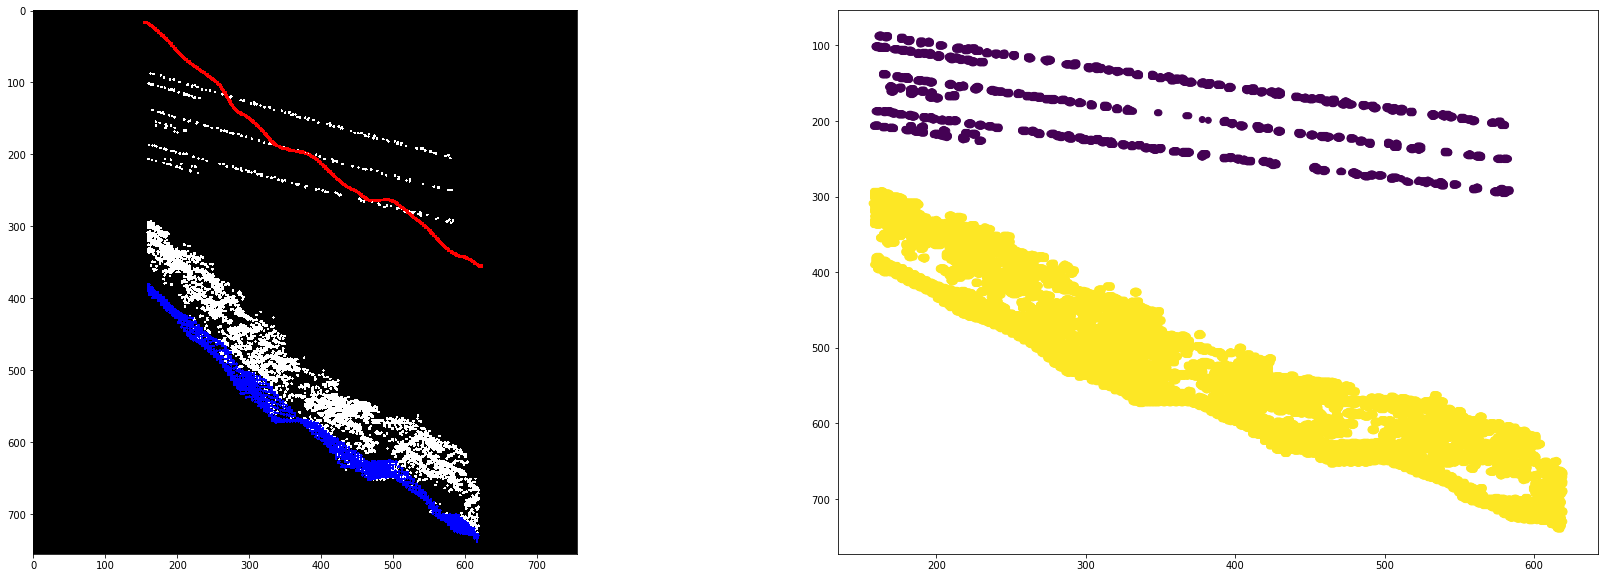

In [32]:
file='9622-1-044_037.png'
img0=cv2.imread(path+file)
img0 = img0[ : , : , (2, 1, 0)]
imgp=img_pre(img0)
X=coor(imgp)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.subplot(1,2,2)
ax = plt.gca() 
ax.invert_yaxis()
y_pred = DBSCAN(eps = 64).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(set(y_pred))

#### 以上是順利將電纜與地表分開的圖

## 測試 全部圖跑DBSCAN, eps = 64, 計算分群種類數量

In [9]:
df = pd.read_csv("./liddar_img_v1.csv")
df.head(3)

id  area               image  valid_count  valid_count_zero  is_finished  \
0  3094     1  9621-1-006_001.png            1                 3            1   
1  1427     1  9621-1-006_002.png            0                 3            1   
2  4814     1  9621-1-006_003.png            3                 2            1   

           update_t  
0  2020/12/23 12:21  
1  2020/12/23 12:21  
2  2020/12/23 12:21

In [68]:
DList=[]
for i in range(df.shape[0]):
    file=df['image'][i]
    img0=cv2.imread(path+file)
    img0 = img0[ : , : , (2, 1, 0)]
    imgp=img_pre(img0)
    X=coor(imgp)
    y_pred = DBSCAN(eps = 64).fit_predict(X)
    result=len(set(y_pred))
    DList.append(result)
    print(i,file,result)

0 9621-1-006_001.png 1
1 9621-1-006_002.png 1
2 9621-1-006_003.png 1
3 9621-1-006_004.png 1
4 9621-1-006_005.png 1
5 9621-1-006_006.png 1
6 9621-1-006_007.png 1
7 9621-1-006_008.png 1
8 9621-1-006_010.png 1
9 9621-1-006_011.png 1
10 9621-1-006_012.png 1
11 9621-1-006_013.png 1
12 9621-1-006_014.png 1
13 9621-1-006_015.png 1
14 9621-1-006_017.png 1
15 9621-1-006_018.png 2
16 9621-1-006_022.png 1
17 9621-1-006_023.png 1
18 9621-1-006_024.png 1
19 9621-1-006_028.png 1
20 9621-1-006_032.png 1
21 9621-1-006_035.png 1
22 9621-1-006_045.png 1
23 9621-1-006_046.png 1
24 9621-1-006_047.png 1
25 9621-1-006_048.png 2
26 9621-1-006_052.png 2
27 9621-1-006_053.png 1
28 9621-1-006_063.png 1
29 9621-1-006_064.png 1
30 9621-1-006_065.png 1
31 9621-1-006_066.png 1
32 9621-1-006_067.png 1
33 9621-1-006_068.png 1
34 9621-1-006_069.png 1
35 9621-1-006_070.png 1
36 9621-1-006_071.png 1
37 9621-1-006_072.png 1
38 9621-1-006_073.png 1
39 9621-1-006_074.png 1
40 9621-1-006_075.png 1
41 9621-1-006_076.png 1
42

333 9622-1-048_061.png 2
334 9622-1-048_062.png 2
335 9622-1-048_063.png 2
336 9622-1-048_064.png 2
337 9622-1-048_065.png 2
338 9622-1-048_066.png 2
339 9622-1-048_067.png 2
340 9622-1-048_068.png 2
341 9622-1-048_069.png 3
342 9622-1-048_070.png 3
343 9622-1-048_071.png 2
344 9622-1-048_072.png 2
345 9622-1-048_073.png 2
346 9622-1-048_074.png 2
347 9622-1-048_075.png 2
348 9622-1-048_076.png 2
349 9622-1-048_077.png 2
350 9622-1-048_078.png 2
351 9622-1-048_079.png 2
352 9622-1-048_080.png 2
353 9622-1-048_081.png 2
354 9622-1-048_082.png 2
355 9622-1-048_083.png 2
356 9622-1-048_084.png 1
357 9622-1-048_085.png 3
358 9622-1-048_086.png 1
359 9622-1-048_087.png 1
360 9622-1-048_088.png 2
361 9622-1-048_089.png 2
362 9622-1-048_090.png 2
363 9622-1-048_091.png 2
364 9622-1-048_092.png 2
365 9622-1-048_093.png 2
366 9622-1-048_094.png 2
367 9622-1-048_095.png 2
368 9622-1-048_096.png 2
369 9622-1-048_097.png 2
370 9622-1-048_098.png 2
371 9622-1-048_099.png 2
372 9622-1-048_100.png 3


661 9622-1-050_112.png 2
662 9622-1-050_113.png 2
663 9622-1-050_114.png 2
664 9622-1-050_115.png 2
665 9622-1-050_116.png 2
666 9622-1-050_117.png 2
667 9622-1-050_118.png 2
668 9622-1-050_119.png 2
669 9622-1-050_120.png 2
670 9622-1-050_121.png 2
671 9622-1-050_122.png 2
672 9622-1-050_123.png 2
673 9622-1-050_124.png 2
674 9622-1-050_125.png 2
675 9622-1-050_126.png 2
676 9622-1-050_127.png 2
677 9622-1-050_128.png 2
678 9622-1-050_129.png 2
679 9622-1-050_130.png 2
680 9622-1-050_131.png 2
681 9622-1-050_132.png 2
682 9622-1-050_133.png 2
683 9622-1-050_134.png 2
684 9622-1-050_135.png 2
685 9622-1-050_136.png 2
686 9622-1-050_137.png 2
687 9622-1-050_138.png 2
688 9622-1-050_139.png 2
689 9622-1-050_140.png 2
690 9622-1-050_141.png 2
691 9622-1-050_142.png 2
692 9622-1-050_143.png 2
693 9622-1-050_144.png 2
694 9622-1-050_145.png 2
695 9622-1-050_146.png 2
696 9622-1-050_147.png 3
697 9622-1-050_148.png 3
698 9622-1-050_149.png 3
699 9622-1-050_150.png 3
700 9622-1-050_151.png 3


989 9622-1-075_031.png 3
990 9622-1-075_032.png 5
991 9622-1-075_033.png 2
992 9622-1-075_034.png 3
993 9622-1-075_035.png 3
994 9622-1-075_036.png 1
995 9622-1-075_037.png 1
996 9622-1-081_001.png 2
997 9622-1-081_002.png 3
998 9622-1-081_003.png 2
999 9622-1-081_004.png 2
1000 9622-1-081_005.png 2
1001 9622-1-081_006.png 2
1002 9622-1-081_007.png 3
1003 9622-1-081_008.png 2
1004 9622-1-081_009.png 2
1005 9622-1-081_010.png 2
1006 9622-1-081_011.png 2
1007 9622-1-081_012.png 3
1008 9622-1-081_013.png 2
1009 9622-1-081_014.png 2
1010 9622-1-081_015.png 2
1011 9622-1-081_016.png 2
1012 9622-1-081_017.png 2
1013 9622-1-081_018.png 2
1014 9622-1-081_019.png 2
1015 9622-1-081_020.png 1
1016 9622-1-081_021.png 2
1017 9622-1-081_022.png 2
1018 9622-1-081_023.png 1
1019 9622-1-081_024.png 2
1020 9622-1-081_025.png 2
1021 9622-1-081_026.png 2
1022 9622-1-081_027.png 2
1023 9622-1-081_028.png 2
1024 9622-1-081_029.png 2
1025 9622-1-081_030.png 2
1026 9622-1-081_031.png 1
1027 9622-1-081_032.png

1305 9622-1-085_004.png 1
1306 9622-1-087_001.png 1
1307 9622-1-090_001.png 1
1308 9622-1-091_001.png 1
1309 9622-1-091_002.png 1
1310 9622-1-091_003.png 1
1311 9622-1-092_001.png 1
1312 9622-1-092_002.png 1
1313 9622-1-092_003.png 1
1314 9622-1-092_004.png 1
1315 9622-1-092_005.png 1
1316 9622-1-092_006.png 1
1317 9622-1-092_009.png 1
1318 9622-1-093_001.png 1
1319 9622-1-093_002.png 1
1320 9622-1-094_001.png 2
1321 9622-1-094_002.png 1
1322 9622-1-094_003.png 1
1323 9622-1-094_004.png 1
1324 9622-1-094_005.png 1
1325 9622-1-094_006.png 1
1326 9622-1-094_007.png 1
1327 9622-1-094_008.png 1
1328 9622-1-094_009.png 1
1329 9622-1-094_010.png 1
1330 9622-1-094_011.png 1
1331 9622-1-094_012.png 1
1332 9622-1-094_013.png 1
1333 9622-1-094_014.png 1
1334 9622-1-094_015.png 1
1335 9622-1-094_016.png 1
1336 9622-1-094_017.png 1
1337 9622-1-094_018.png 1
1338 9622-1-094_019.png 1
1339 9622-1-094_020.png 1
1340 9622-1-094_021.png 1
1341 9622-1-094_022.png 1
1342 9622-1-095_001.png 1
1343 9622-1-

1621 9622-2-029_029.png 2
1622 9622-2-029_030.png 2
1623 9622-2-029_031.png 2
1624 9622-2-029_032.png 2
1625 9622-2-029_033.png 1
1626 9622-2-029_034.png 2
1627 9622-2-029_035.png 1
1628 9622-2-029_036.png 2
1629 9622-2-029_037.png 3
1630 9622-2-029_038.png 3
1631 9622-2-029_039.png 1
1632 9622-2-029_040.png 1
1633 9622-2-029_041.png 1
1634 9622-2-029_042.png 2
1635 9622-2-029_043.png 1
1636 9622-2-029_044.png 2
1637 9622-2-029_045.png 1
1638 9622-2-029_046.png 1
1639 9622-2-030_001.png 1
1640 9622-2-030_002.png 1
1641 9622-2-030_003.png 2
1642 9622-2-030_004.png 2
1643 9622-2-030_005.png 1
1644 9622-2-030_006.png 1
1645 9622-2-030_007.png 2
1646 9622-2-030_008.png 1
1647 9622-2-030_009.png 1
1648 9622-2-030_010.png 1
1649 9622-2-030_011.png 1
1650 9622-2-030_012.png 1
1651 9622-2-030_013.png 1
1652 9622-2-030_014.png 1
1653 9622-2-030_015.png 1
1654 9622-2-030_016.png 1
1655 9622-2-030_017.png 1
1656 9622-2-030_018.png 1
1657 9622-2-030_019.png 1
1658 9622-2-030_020.png 1
1659 9622-2-

1937 9622-3-045_015.png 1
1938 9622-3-046_001.png 1
1939 9622-3-047_001.png 1
1940 9622-3-049_001.png 1
1941 9622-3-049_002.png 1
1942 9622-3-049_003.png 1
1943 9622-3-049_004.png 1
1944 9622-3-049_005.png 1
1945 9622-3-049_006.png 1
1946 9622-3-049_007.png 1
1947 9622-3-049_008.png 1
1948 9622-3-049_009.png 1
1949 9622-3-050_001.png 1
1950 9622-3-050_002.png 1
1951 9622-3-050_003.png 2
1952 9622-3-054_001.png 1
1953 9622-3-054_002.png 1
1954 9622-3-054_003.png 1
1955 9622-3-054_004.png 1
1956 9622-3-054_005.png 1
1957 9622-3-054_006.png 1
1958 9622-3-054_007.png 1
1959 9622-3-054_008.png 1
1960 9622-3-054_009.png 1
1961 9622-3-054_010.png 1
1962 9622-3-054_011.png 1
1963 9622-3-054_012.png 1
1964 9622-3-055_001.png 1
1965 9622-3-055_002.png 1
1966 9622-3-055_003.png 1
1967 9622-3-055_004.png 1
1968 9622-3-055_005.png 1
1969 9622-3-055_006.png 1
1970 9622-3-055_007.png 1
1971 9622-3-055_008.png 1
1972 9622-3-055_009.png 1
1973 9622-3-055_010.png 1
1974 9622-3-055_011.png 1
1975 9622-3-

SystemError: <built-in function dbscan_inner> returned a result with an error set

In [ ]:
DList2=[]
for i in range(2014,df.shape[0],1):
    file=df['image'][i]
    img0=cv2.imread(path+file)
    img0 = img0[ : , : , (2, 1, 0)]
    imgp=img_pre(img0)
    X=coor(imgp)
    y_pred = DBSCAN(eps = 64).fit_predict(X)
    result=len(set(y_pred))
    DList2.append(result)
    print(i,file,result)

2014 9622-3-066_003.png 1
2015 9622-3-074_001.png 2
2016 9622-3-074_002.png 1
2017 9622-3-074_003.png 2
2018 9622-3-074_004.png 2
2019 9622-3-074_005.png 2
2020 9622-3-074_006.png 2
2021 9622-3-074_007.png 2
2022 9622-3-074_008.png 2
2023 9622-3-074_009.png 2
2024 9622-3-074_010.png 2
2025 9622-3-074_011.png 2
2026 9622-3-074_012.png 2
2027 9622-3-074_013.png 2
2028 9622-3-074_014.png 2
2029 9622-3-074_015.png 2
2030 9622-3-074_016.png 2
2031 9622-3-074_017.png 2
2032 9622-3-074_018.png 2
2033 9622-3-074_019.png 5
2034 9622-3-074_020.png 1
2035 9622-3-074_021.png 1
2036 9622-3-086_001.png 1
2037 9622-3-086_002.png 1
2038 9622-4-080_001.png 2
2039 9622-4-080_002.png 2
2040 9622-4-080_003.png 2
2041 9622-4-080_004.png 4
2042 9622-4-080_005.png 4
2043 9622-4-080_006.png 2
2044 9622-4-080_007.png 5
2045 9622-4-080_008.png 5
2046 9622-4-080_009.png 2
2047 9622-4-080_010.png 4
2048 9622-4-080_011.png 2
2049 9622-4-080_012.png 4
2050 9622-4-080_013.png 2
2051 9622-4-080_014.png 4
2052 9622-4-

2330 9721-1-003_077.png 3
2331 9721-1-003_078.png 2
2332 9721-1-003_079.png 2
2333 9721-1-003_080.png 3
2334 9721-1-003_081.png 2
2335 9721-1-003_082.png 2
2336 9721-1-003_083.png 2
2337 9721-1-003_084.png 2
2338 9721-1-003_085.png 2
2339 9721-1-003_086.png 2
2340 9721-1-003_087.png 2
2341 9721-1-003_088.png 2
2342 9721-1-003_089.png 2
2343 9721-1-003_090.png 2
2344 9721-1-003_091.png 2
2345 9721-1-003_092.png 2
2346 9721-1-003_093.png 2
2347 9721-1-003_094.png 2
2348 9721-1-003_095.png 2
2349 9721-1-003_096.png 2
2350 9721-1-003_097.png 2
2351 9721-1-003_098.png 2
2352 9721-1-003_099.png 2
2353 9721-1-003_100.png 2
2354 9721-1-003_101.png 2
2355 9721-1-003_102.png 2
2356 9721-1-003_103.png 2
2357 9721-1-003_104.png 2
2358 9721-1-003_105.png 2
2359 9721-1-003_106.png 2
2360 9721-1-003_107.png 2
2361 9721-1-003_108.png 2
2362 9721-1-003_109.png 2
2363 9721-1-003_110.png 2
2364 9721-1-003_111.png 2
2365 9721-1-003_112.png 2
2366 9721-1-003_113.png 2
2367 9721-1-003_114.png 2
2368 9721-1-

2646 9721-4-028_001.png 1
2647 9721-4-028_002.png 1
2648 9721-4-029_001.png 1
2649 9721-4-031_001.png 1
2650 9721-4-032_001.png 1
2651 9721-4-032_002.png 1
2652 9721-4-032_003.png 1
2653 9721-4-032_004.png 1
2654 9721-4-032_005.png 1
2655 9721-4-032_006.png 1
2656 9721-4-032_007.png 1
2657 9721-4-032_008.png 1
2658 9721-4-032_009.png 1
2659 9721-4-034_001.png 1
2660 9721-4-035_001.png 1
2661 9721-4-035_002.png 1
2662 9721-4-035_003.png 1
2663 9721-4-035_004.png 1
2664 9721-4-035_005.png 1
2665 9721-4-035_006.png 1
2666 9721-4-035_007.png 1
2667 9721-4-035_008.png 1
2668 9721-4-035_009.png 1
2669 9721-4-035_010.png 1
2670 9721-4-035_011.png 1
2671 9721-4-035_012.png 1
2672 9721-4-035_013.png 1
2673 9721-4-036_001.png 1
2674 9721-4-036_002.png 1
2675 9721-4-037_001.png 1
2676 9721-4-037_002.png 1
2677 9721-4-038_001.png 1
2678 9721-4-038_002.png 1
2679 9721-4-038_003.png 1
2680 9721-4-038_004.png 1
2681 9721-4-038_005.png 1
2682 9721-4-038_006.png 1
2683 9721-4-038_007.png 1
2684 9721-4-

2962 9721-4-056_093.png 1
2963 9721-4-056_094.png 1
2964 9721-4-056_095.png 1
2965 9721-4-056_096.png 1
2966 9721-4-056_097.png 1
2967 9721-4-056_098.png 1
2968 9721-4-056_099.png 1
2969 9721-4-056_100.png 1
2970 9721-4-056_101.png 1
2971 9721-4-056_102.png 1
2972 9721-4-056_103.png 1
2973 9721-4-056_104.png 1
2974 9721-4-057_001.png 1
2975 9721-4-057_003.png 1
2976 9721-4-057_004.png 1
2977 9721-4-057_005.png 1
2978 9721-4-057_006.png 1
2979 9721-4-057_007.png 1
2980 9721-4-057_008.png 1
2981 9721-4-057_009.png 1
2982 9721-4-057_010.png 1
2983 9721-4-057_011.png 1
2984 9721-4-057_012.png 1
2985 9721-4-057_013.png 1
2986 9721-4-057_014.png 1
2987 9721-4-057_015.png 1
2988 9721-4-057_016.png 1
2989 9721-4-057_017.png 1
2990 9721-4-057_018.png 1
2991 9721-4-057_019.png 1
2992 9721-4-057_020.png 1
2993 9721-4-058_002.png 1
2994 9721-4-058_003.png 1
2995 9721-4-058_004.png 1
2996 9721-4-058_005.png 1
2997 9721-4-058_006.png 1
2998 9721-4-058_007.png 1
2999 9721-4-058_008.png 1
3000 9721-4-

3278 9721-4-074_020.png 1
3279 9721-4-074_021.png 1
3280 9721-4-074_022.png 1
3281 9721-4-074_023.png 1
3282 9721-4-074_024.png 1
3283 9721-4-074_025.png 1
3284 9721-4-074_026.png 1
3285 9721-4-074_027.png 1
3286 9721-4-074_028.png 1
3287 9721-4-074_029.png 1
3288 9721-4-074_030.png 1
3289 9721-4-074_031.png 1
3290 9721-4-074_032.png 1
3291 9721-4-074_033.png 1
3292 9721-4-074_034.png 1
3293 9721-4-074_035.png 1
3294 9721-4-074_036.png 1
3295 9721-4-074_037.png 1
3296 9721-4-074_038.png 1
3297 9721-4-074_039.png 1
3298 9721-4-080_001.png 2
3299 9721-4-080_002.png 1
3300 9721-4-080_003.png 2
3301 9721-4-080_004.png 3
3302 9721-4-080_005.png 1
3303 9721-4-080_006.png 1
3304 9721-4-080_007.png 2
3305 9721-4-080_008.png 2
3306 9721-4-080_009.png 1
3307 9721-4-080_010.png 1
3308 9721-4-080_011.png 1
3309 9721-4-080_012.png 1
3310 9721-4-080_013.png 1
3311 9721-4-080_014.png 1
3312 9721-4-080_015.png 3
3313 9721-4-080_016.png 1
3314 9721-4-080_017.png 1
3315 9721-4-080_018.png 2
3316 9721-4-

3594 9722-2-052_012.png 2
3595 9722-2-052_013.png 1
3596 9722-2-052_014.png 2
3597 9722-2-052_015.png 2
3598 9722-2-052_016.png 2
3599 9722-2-052_017.png 2
3600 9722-2-052_018.png 2
3601 9722-2-052_019.png 2
3602 9722-2-052_020.png 3
3603 9722-2-052_021.png 2
3604 9722-2-052_022.png 2
3605 9722-2-052_023.png 3
3606 9722-2-052_024.png 3
3607 9722-2-052_025.png 2
3608 9722-2-052_026.png 3
3609 9722-2-052_027.png 4
3610 9722-2-052_028.png 3
3611 9722-2-052_029.png 3
3612 9722-2-052_030.png 3
3613 9722-2-053_001.png 1
3614 9722-2-053_002.png 1
3615 9722-2-053_003.png 1
3616 9722-2-053_004.png 1
3617 9722-2-053_005.png 1
3618 9722-2-053_006.png 1
3619 9722-2-062_001.png 2
3620 9722-2-062_002.png 2
3621 9722-2-062_003.png 2
3622 9722-2-062_004.png 2
3623 9722-2-062_005.png 2
3624 9722-2-062_006.png 2
3625 9722-2-062_007.png 2
3626 9722-2-062_008.png 2
3627 9722-2-062_009.png 2
3628 9722-2-062_010.png 2
3629 9722-2-062_011.png 2
3630 9722-2-062_012.png 2
3631 9722-2-062_013.png 2
3632 9722-2-

3910 9722-2-063_161.png 2
3911 9722-2-063_162.png 2
3912 9722-2-063_163.png 2
3913 9722-2-063_164.png 1
3914 9722-2-063_165.png 2
3915 9722-2-063_166.png 2
3916 9722-2-063_167.png 2
3917 9722-2-063_168.png 2
3918 9722-2-063_169.png 2
3919 9722-2-063_170.png 2
3920 9722-2-063_171.png 2
3921 9722-2-063_172.png 2
3922 9722-2-063_173.png 2
3923 9722-2-063_174.png 3
3924 9722-2-063_175.png 2
3925 9722-2-063_176.png 2
3926 9722-2-063_177.png 2
3927 9722-2-063_178.png 2
3928 9722-2-063_179.png 2
3929 9722-2-063_180.png 1
3930 9722-2-063_181.png 3
3931 9722-2-063_182.png 3
3932 9722-2-063_183.png 3
3933 9722-2-063_184.png 3
3934 9722-2-063_185.png 2
3935 9722-2-063_186.png 2
3936 9722-2-063_187.png 2
3937 9722-2-063_188.png 2
3938 9722-2-063_189.png 2
3939 9722-2-063_190.png 2
3940 9722-2-063_191.png 2
3941 9722-2-063_192.png 2
3942 9722-2-063_193.png 2
3943 9722-2-063_194.png 1
3944 9722-2-063_195.png 2
3945 9722-2-063_196.png 1
3946 9722-2-063_197.png 2
3947 9722-2-063_198.png 2
3948 9722-2-

4226 9722-2-084_063.png 2
4227 9722-2-084_064.png 2
4228 9722-2-084_065.png 2
4229 9722-2-084_066.png 3
4230 9722-2-084_067.png 3
4231 9722-2-084_068.png 2
4232 9722-2-084_069.png 1
4233 9722-2-084_070.png 2
4234 9722-2-084_071.png 3
4235 9722-2-084_072.png 2
4236 9722-2-084_073.png 3
4237 9722-2-084_074.png 2
4238 9722-2-084_075.png 1
4239 9722-2-084_076.png 2
4240 9722-2-084_077.png 2
4241 9722-2-084_078.png 2
4242 9722-2-084_079.png 2
4243 9722-2-084_080.png 2
4244 9722-2-084_081.png 2
4245 9722-2-084_082.png 2
4246 9722-2-084_083.png 2
4247 9722-2-084_084.png 2
4248 9722-2-084_085.png 2
4249 9722-2-084_086.png 2
4250 9722-2-084_087.png 2
4251 9722-2-084_088.png 2
4252 9722-2-091_001.png 1
4253 9722-2-091_002.png 1
4254 9722-2-092_001.png 1
4255 9722-2-092_002.png 1
4256 9722-2-093_001.png 2
4257 9722-2-093_002.png 4
4258 9722-2-093_003.png 3
4259 9722-2-093_004.png 4
4260 9722-2-093_005.png 4
4261 9722-2-093_006.png 2
4262 9722-2-093_007.png 2
4263 9722-2-093_008.png 2
4264 9722-2-

4542 9722-3-059_046.png 3
4543 9722-3-059_047.png 4
4544 9722-3-059_048.png 3
4545 9722-3-059_049.png 2
4546 9722-3-059_050.png 2
4547 9722-3-059_051.png 2
4548 9722-3-059_052.png 2
4549 9722-3-059_053.png 2
4550 9722-3-059_054.png 2
4551 9722-3-059_055.png 2
4552 9722-3-059_056.png 2
4553 9722-3-059_057.png 2
4554 9722-3-059_058.png 2
4555 9722-3-059_059.png 2
4556 9722-3-059_060.png 2
4557 9722-3-059_061.png 2
4558 9722-3-059_062.png 2
4559 9722-3-059_063.png 2
4560 9722-3-059_064.png 2
4561 9722-3-059_065.png 2
4562 9722-3-059_066.png 2
4563 9722-3-059_067.png 2
4564 9722-3-059_068.png 2
4565 9722-3-059_069.png 2
4566 9722-3-059_070.png 2
4567 9722-3-059_071.png 2
4568 9722-3-059_072.png 2
4569 9722-3-059_073.png 2
4570 9722-3-059_074.png 2
4571 9722-3-059_075.png 2
4572 9722-3-059_076.png 2
4573 9722-3-059_077.png 2
4574 9722-3-059_078.png 2
4575 9722-3-059_079.png 2
4576 9722-3-059_080.png 2
4577 9722-3-059_081.png 2
4578 9722-3-059_082.png 2
4579 9722-3-059_083.png 2
4580 9722-3-

4858 9722-3-100_012.png 1
4859 9722-3-100_013.png 1
4860 9722-4-008_001.png 1
4861 9722-4-008_002.png 2
4862 9722-4-008_003.png 3
4863 9722-4-008_004.png 2
4864 9722-4-008_005.png 4
4865 9722-4-008_006.png 3
4866 9722-4-008_007.png 2
4867 9722-4-008_008.png 3
4868 9722-4-008_009.png 2
4869 9722-4-008_010.png 2
4870 9722-4-008_011.png 4
4871 9722-4-008_012.png 2
4872 9722-4-008_013.png 5
4873 9722-4-008_014.png 3
4874 9722-4-008_015.png 3
4875 9722-4-008_016.png 3
4876 9722-4-008_017.png 6
4877 9722-4-008_018.png 2
4878 9722-4-008_019.png 4
4879 9722-4-008_020.png 2
4880 9722-4-008_021.png 3
4881 9722-4-008_022.png 2
4882 9722-4-008_023.png 2
4883 9722-4-008_024.png 3
4884 9722-4-008_025.png 2
4885 9722-4-008_026.png 2
4886 9722-4-008_027.png 2
4887 9722-4-008_028.png 3
4888 9722-4-008_029.png 2
4889 9722-4-008_030.png 2
4890 9722-4-008_031.png 2
4891 9722-4-008_032.png 2
4892 9722-4-008_033.png 3
4893 9722-4-008_034.png 2
4894 9722-4-008_035.png 2
4895 9722-4-008_036.png 2
4896 9722-4-

5174 9722-4-012_129.png 2
5175 9722-4-012_130.png 1
5176 9722-4-012_131.png 2
5177 9722-4-012_132.png 1
5178 9722-4-012_133.png 2
5179 9722-4-012_134.png 2
5180 9722-4-012_135.png 1
5181 9722-4-012_136.png 1
5182 9722-4-012_137.png 1
5183 9722-4-012_138.png 1
5184 9722-4-012_139.png 1
5185 9722-4-012_140.png 1
5186 9722-4-012_141.png 1
5187 9722-4-012_142.png 1
5188 9722-4-012_143.png 3
5189 9722-4-012_144.png 4
5190 9722-4-012_145.png 1
5191 9722-4-012_146.png 1
5192 9722-4-012_147.png 1
5193 9722-4-012_148.png 1
5194 9722-4-012_149.png 1
5195 9722-4-012_150.png 1
5196 9722-4-012_151.png 1
5197 9722-4-012_152.png 2
5198 9722-4-012_153.png 1
5199 9722-4-012_154.png 1
5200 9722-4-012_155.png 2
5201 9722-4-012_156.png 4
5202 9722-4-012_157.png 4
5203 9722-4-012_158.png 3
5204 9722-4-012_159.png 1
5205 9722-4-012_160.png 3
5206 9722-4-012_161.png 1
5207 9722-4-012_162.png 4
5208 9722-4-012_163.png 5
5209 9722-4-012_164.png 4
5210 9722-4-012_165.png 3
5211 9722-4-012_166.png 1
5212 9722-4-

5490 9722-4-016_032.png 2
5491 9722-4-016_033.png 2
5492 9722-4-016_034.png 3
5493 9722-4-016_035.png 2
5494 9722-4-016_036.png 2
5495 9722-4-016_037.png 2
5496 9722-4-016_038.png 2
5497 9722-4-016_039.png 2
5498 9722-4-016_040.png 2
5499 9722-4-016_041.png 2
5500 9722-4-016_042.png 2
5501 9722-4-016_043.png 2
5502 9722-4-016_044.png 2
5503 9722-4-016_045.png 2
5504 9722-4-016_046.png 2
5505 9722-4-016_047.png 2
5506 9722-4-016_048.png 2
5507 9722-4-016_049.png 2
5508 9722-4-016_050.png 2
5509 9722-4-016_051.png 2
5510 9722-4-016_052.png 2
5511 9722-4-016_053.png 1
5512 9722-4-016_054.png 3
5513 9722-4-016_055.png 3
5514 9722-4-016_056.png 1
5515 9722-4-016_057.png 1
5516 9722-4-016_058.png 1
5517 9722-4-016_059.png 2
5518 9722-4-016_060.png 3
5519 9722-4-016_061.png 2
5520 9722-4-016_062.png 2
5521 9722-4-016_063.png 1
5522 9722-4-016_064.png 2
5523 9722-4-016_065.png 1
5524 9722-4-016_066.png 2
5525 9722-4-016_067.png 2
5526 9722-4-016_068.png 2
5527 9722-4-016_069.png 2
5528 9722-4-

5806 9722-4-022_012.png 2
5807 9722-4-022_013.png 2
5808 9722-4-022_014.png 2
5809 9722-4-022_015.png 2
5810 9722-4-022_016.png 2
5811 9722-4-022_017.png 2
5812 9722-4-022_018.png 2
5813 9722-4-022_019.png 2
5814 9722-4-022_020.png 2
5815 9722-4-022_021.png 2
5816 9722-4-022_022.png 2
5817 9722-4-022_023.png 2
5818 9722-4-022_024.png 2
5819 9722-4-022_025.png 2
5820 9722-4-022_026.png 2
5821 9722-4-022_027.png 2
5822 9722-4-022_028.png 3
5823 9722-4-022_029.png 4
5824 9722-4-022_030.png 2
5825 9722-4-022_031.png 3
5826 9722-4-022_032.png 2
5827 9722-4-022_033.png 3
5828 9722-4-022_034.png 3
5829 9722-4-022_035.png 3
5830 9722-4-022_036.png 4
5831 9722-4-022_037.png 4
5832 9722-4-022_038.png 3
5833 9722-4-022_039.png 3
5834 9722-4-022_040.png 2
5835 9722-4-022_041.png 7
5836 9722-4-023_001.png 2
5837 9722-4-023_002.png 2
5838 9722-4-023_003.png 2
5839 9722-4-023_004.png 2
5840 9722-4-023_005.png 2
5841 9722-4-023_006.png 2
5842 9722-4-023_007.png 2
5843 9722-4-023_008.png 2
5844 9722-4-

6122 9722-4-024_125.png 2
6123 9722-4-024_126.png 1
6124 9722-4-024_127.png 2
6125 9722-4-024_128.png 2
6126 9722-4-024_129.png 2
6127 9722-4-024_130.png 2
6128 9722-4-024_131.png 2
6129 9722-4-024_132.png 2
6130 9722-4-024_133.png 2
6131 9722-4-024_134.png 2
6132 9722-4-024_135.png 3
6133 9722-4-024_136.png 2
6134 9722-4-024_137.png 2
6135 9722-4-024_138.png 3
6136 9722-4-024_139.png 3
6137 9722-4-024_140.png 2
6138 9722-4-024_141.png 3
6139 9722-4-024_142.png 2
6140 9722-4-024_143.png 2
6141 9722-4-024_144.png 2
6142 9722-4-025_001.png 2
6143 9722-4-025_002.png 2
6144 9722-4-025_003.png 2
6145 9722-4-025_004.png 2
6146 9722-4-025_005.png 2
6147 9722-4-025_006.png 2
6148 9722-4-025_007.png 2
6149 9722-4-025_008.png 2
6150 9722-4-025_009.png 2
6151 9722-4-025_010.png 2
6152 9722-4-025_011.png 2
6153 9722-4-025_012.png 2
6154 9722-4-025_013.png 2
6155 9722-4-025_014.png 3
6156 9722-4-025_015.png 3
6157 9722-4-025_016.png 3
6158 9722-4-025_017.png 3
6159 9722-4-025_018.png 3
6160 9722-4-

6438 9722-4-033_100.png 2
6439 9722-4-033_101.png 2
6440 9722-4-033_102.png 2
6441 9722-4-033_103.png 2
6442 9722-4-033_104.png 2
6443 9722-4-033_105.png 2
6444 9722-4-033_106.png 2
6445 9722-4-033_107.png 2
6446 9722-4-033_108.png 2
6447 9722-4-033_109.png 2
6448 9722-4-033_110.png 3
6449 9722-4-033_111.png 4
6450 9722-4-033_112.png 2
6451 9722-4-033_113.png 2
6452 9722-4-033_114.png 2
6453 9722-4-033_115.png 2
6454 9722-4-033_116.png 2
6455 9722-4-033_117.png 2
6456 9722-4-033_118.png 2
6457 9722-4-033_119.png 2
6458 9722-4-033_120.png 2
6459 9722-4-033_121.png 2
6460 9722-4-033_122.png 2
6461 9722-4-033_123.png 2
6462 9722-4-033_124.png 1
6463 9722-4-033_125.png 2
6464 9722-4-033_126.png 2
6465 9722-4-033_127.png 2
6466 9722-4-033_128.png 2
6467 9722-4-033_129.png 2
6468 9722-4-033_130.png 1
6469 9722-4-033_131.png 1
6470 9722-4-033_132.png 1
6471 9722-4-033_133.png 1
6472 9722-4-033_134.png 1
6473 9722-4-033_135.png 1
6474 9722-4-033_136.png 2
6475 9722-4-033_137.png 2
6476 9722-4-

6754 9722-4-041_027.png 2
6755 9722-4-041_028.png 2
6756 9722-4-041_029.png 3
6757 9722-4-041_030.png 3
6758 9722-4-041_031.png 3
6759 9722-4-041_032.png 4
6760 9722-4-041_033.png 2
6761 9722-4-041_034.png 2
6762 9722-4-041_035.png 3
6763 9722-4-041_036.png 2
6764 9722-4-041_037.png 2
6765 9722-4-041_038.png 3
6766 9722-4-041_039.png 2
6767 9722-4-041_040.png 3
6768 9722-4-041_041.png 2
6769 9722-4-041_042.png 3
6770 9722-4-041_043.png 3
6771 9722-4-041_044.png 3
6772 9722-4-041_045.png 2
6773 9722-4-041_046.png 2
6774 9722-4-041_047.png 2
6775 9722-4-041_048.png 2
6776 9722-4-041_049.png 2
6777 9722-4-041_050.png 2
6778 9722-4-041_051.png 2
6779 9722-4-041_052.png 2
6780 9722-4-041_053.png 2
6781 9722-4-041_054.png 3
6782 9722-4-041_055.png 2
6783 9722-4-041_056.png 2
6784 9722-4-041_057.png 2
6785 9722-4-041_058.png 2
6786 9722-4-041_059.png 2
6787 9722-4-041_060.png 4
6788 9722-4-041_061.png 2
6789 9722-4-041_062.png 2
6790 9722-4-041_063.png 2
6791 9722-4-041_064.png 2
6792 9722-4-

7070 9722-4-050_106.png 2
7071 9722-4-050_107.png 3
7072 9722-4-050_108.png 3
7073 9722-4-050_109.png 3
7074 9722-4-050_110.png 3
7075 9722-4-050_111.png 3
7076 9722-4-050_112.png 3
7077 9722-4-050_113.png 2
7078 9722-4-050_114.png 2
7079 9722-4-050_115.png 2
7080 9722-4-050_116.png 2
7081 9722-4-050_117.png 2
7082 9722-4-050_118.png 2
7083 9722-4-050_119.png 2
7084 9722-4-050_120.png 2
7085 9722-4-050_121.png 2
7086 9722-4-050_122.png 2
7087 9722-4-050_123.png 2
7088 9722-4-050_124.png 2
7089 9722-4-050_125.png 2
7090 9722-4-050_126.png 2
7091 9722-4-050_127.png 2
7092 9722-4-050_128.png 2
7093 9722-4-050_129.png 2
7094 9722-4-050_130.png 2
7095 9722-4-050_131.png 2
7096 9722-4-050_132.png 1
7097 9722-4-050_133.png 3
7098 9722-4-050_134.png 2
7099 9722-4-050_135.png 3
7100 9722-4-050_136.png 2
7101 9722-4-050_137.png 2
7102 9722-4-050_138.png 3
7103 9722-4-050_139.png 3
7104 9722-4-050_140.png 2
7105 9722-4-050_141.png 2
7106 9722-4-050_142.png 1
7107 9722-4-050_143.png 2
7108 9722-4-

7386 9723-2-091_156.png 2
7387 9723-2-091_157.png 2
7388 9723-2-091_158.png 2
7389 9723-2-091_159.png 2
7390 9723-2-091_160.png 2
7391 9723-2-091_161.png 3
7392 9723-2-091_162.png 2
7393 9723-2-091_163.png 2
7394 9723-2-091_164.png 2
7395 9723-2-091_165.png 2
7396 9723-2-091_166.png 2
7397 9723-2-091_167.png 2
7398 9723-2-091_168.png 2
7399 9723-2-091_169.png 2
7400 9723-2-091_170.png 2
7401 9723-2-091_171.png 1
7402 9723-2-091_172.png 2
7403 9723-2-091_173.png 2
7404 9723-2-091_174.png 2
7405 9723-2-091_175.png 2
7406 9723-2-091_176.png 1
7407 9723-2-091_177.png 2
7408 9723-2-091_178.png 1
7409 9723-2-091_179.png 2
7410 9723-2-091_180.png 2
7411 9723-2-091_181.png 2
7412 9723-2-091_182.png 2
7413 9723-2-091_183.png 3
7414 9723-2-091_184.png 2
7415 9723-2-091_185.png 2
7416 9723-2-091_186.png 2
7417 9723-2-091_187.png 2
7418 9723-2-091_188.png 2
7419 9723-2-091_189.png 2
7420 9723-2-091_190.png 2
7421 9723-2-091_191.png 2
7422 9723-2-091_192.png 3
7423 9723-2-091_193.png 2
7424 9723-2-

In [38]:
#DList3=[]
for i in range(8330,df.shape[0],1):
    file=df['image'][i]
    img0=cv2.imread(path+file)
    img0 = img0[ : , : , (2, 1, 0)]
    imgp=img_pre(img0)
    X=coor(imgp)
    y_pred = DBSCAN(eps = 64).fit_predict(X)
    result=len(set(y_pred))
    #DList3.append(result)
    print(i,file,result)

8330 9518-1-048_073.png 1
8331 9518-1-048_076.png 1
8332 9518-1-048_079.png 1
8333 9518-1-048_080.png 1
8334 9518-1-048_081.png 1
8335 9518-1-048_082.png 1
8336 9518-1-048_083.png 1
8337 9518-1-048_085.png 1
8338 9518-1-048_093.png 1
8339 9518-1-048_095.png 1
8340 9518-1-048_099.png 1
8341 9518-1-048_103.png 1
8342 9518-1-048_104.png 1
8343 9518-1-048_106.png 1
8344 9518-1-048_108.png 1
8345 9518-1-048_109.png 1
8346 9518-1-048_111.png 1
8347 9518-1-048_112.png 1
8348 9518-1-048_113.png 2
8349 9518-1-049_003.png 1
8350 9518-1-049_004.png 1
8351 9518-1-049_005.png 1
8352 9518-1-049_006.png 1
8353 9518-1-049_007.png 1
8354 9518-1-049_008.png 1
8355 9518-1-049_009.png 1
8356 9518-1-050_001.png 1
8357 9518-1-050_002.png 1
8358 9518-1-050_003.png 1
8359 9518-1-050_004.png 1
8360 9518-1-050_005.png 1
8361 9518-1-050_006.png 1
8362 9518-1-050_007.png 1
8363 9518-1-050_008.png 1
8364 9518-1-050_010.png 1
8365 9518-1-050_011.png 1
8366 9518-1-050_012.png 1
8367 9518-1-050_013.png 1
8368 9518-1-

8646 9518-1-070_021.png 1
8647 9518-1-070_022.png 1
8648 9518-1-070_023.png 1
8649 9518-1-070_024.png 1
8650 9518-1-070_025.png 1
8651 9518-1-077_001.png 1
8652 9518-1-077_002.png 1
8653 9518-1-077_003.png 1
8654 9518-1-077_004.png 3
8655 9518-1-077_005.png 1
8656 9518-1-077_006.png 1
8657 9518-1-077_007.png 1
8658 9518-1-077_008.png 1
8659 9518-1-077_009.png 1
8660 9518-1-077_010.png 1
8661 9518-1-077_011.png 1
8662 9518-1-077_012.png 1
8663 9518-1-077_013.png 1
8664 9518-1-077_014.png 1
8665 9518-1-077_015.png 1
8666 9518-1-077_016.png 1
8667 9518-1-077_017.png 1
8668 9518-1-077_018.png 1
8669 9518-1-077_019.png 1
8670 9518-1-077_020.png 1
8671 9518-1-077_021.png 1
8672 9518-1-077_022.png 1
8673 9518-1-077_023.png 1
8674 9518-1-077_024.png 1
8675 9518-1-078_001.png 1
8676 9518-1-078_002.png 1
8677 9518-1-078_003.png 1
8678 9518-1-078_004.png 1
8679 9518-1-078_005.png 1
8680 9518-1-078_006.png 1
8681 9518-1-078_007.png 1
8682 9518-1-078_008.png 1
8683 9518-1-078_009.png 1
8684 9518-1-

8962 9518-1-098_132.png 1
8963 9518-1-098_133.png 1
8964 9518-1-098_134.png 1
8965 9518-1-098_135.png 2
8966 9518-1-098_136.png 1
8967 9518-1-098_137.png 1
8968 9518-1-098_139.png 1
8969 9518-1-098_143.png 1
8970 9518-1-098_144.png 1
8971 9518-1-098_145.png 1
8972 9518-1-098_146.png 1
8973 9518-1-098_147.png 1
8974 9518-1-098_148.png 1
8975 9518-1-098_149.png 1
8976 9518-1-098_150.png 1
8977 9518-1-098_151.png 1
8978 9518-1-098_152.png 1
8979 9518-1-098_153.png 1
8980 9518-1-098_154.png 1
8981 9518-1-098_155.png 1
8982 9518-1-098_156.png 1
8983 9518-1-098_157.png 1
8984 9518-1-098_159.png 1
8985 9518-1-098_160.png 1
8986 9518-1-098_161.png 1
8987 9518-1-098_162.png 1
8988 9518-1-098_165.png 1
8989 9518-1-098_168.png 1
8990 9518-1-098_169.png 1
8991 9518-1-098_170.png 1
8992 9518-1-098_172.png 1
8993 9518-1-098_173.png 1
8994 9518-1-098_174.png 1
8995 9518-1-098_175.png 1
8996 9518-1-098_176.png 1
8997 9518-1-098_177.png 1
8998 9518-1-098_179.png 1
8999 9518-1-098_181.png 1
9000 9518-1-

9278 9518-1-099_185.png 1
9279 9518-1-099_186.png 1
9280 9518-1-099_187.png 1
9281 9518-1-099_188.png 1
9282 9518-1-099_189.png 1
9283 9518-1-099_190.png 1
9284 9518-1-099_191.png 1
9285 9518-1-099_192.png 1
9286 9518-1-099_193.png 1
9287 9518-1-099_194.png 1
9288 9518-1-099_195.png 1
9289 9518-1-099_196.png 1
9290 9518-1-099_197.png 1
9291 9518-1-099_198.png 1
9292 9518-1-099_199.png 1
9293 9518-1-100_001.png 1
9294 9518-1-100_002.png 1
9295 9518-1-100_003.png 1
9296 9518-1-100_004.png 2
9297 9518-2-007_001.png 2
9298 9518-2-007_002.png 3
9299 9518-2-007_003.png 1
9300 9518-2-007_004.png 1
9301 9518-2-007_005.png 1
9302 9518-2-007_006.png 1
9303 9518-2-007_007.png 1
9304 9518-2-007_008.png 1
9305 9518-2-007_009.png 1
9306 9518-2-007_010.png 1
9307 9518-2-007_011.png 1
9308 9518-2-007_012.png 1
9309 9518-2-007_013.png 1
9310 9518-2-007_014.png 1
9311 9518-2-007_015.png 1
9312 9518-2-007_016.png 1
9313 9518-2-007_017.png 1
9314 9518-2-007_018.png 1
9315 9518-2-007_019.png 1
9316 9518-2-

9594 9518-2-009_011.png 1
9595 9518-2-009_012.png 1
9596 9518-2-009_014.png 1
9597 9518-2-009_015.png 1
9598 9518-2-009_017.png 1
9599 9518-2-009_018.png 1
9600 9518-2-009_019.png 1
9601 9518-2-009_020.png 1
9602 9518-2-009_021.png 1
9603 9518-2-009_022.png 1
9604 9518-2-009_023.png 1
9605 9518-2-009_024.png 1
9606 9518-2-009_025.png 1
9607 9518-2-009_026.png 1
9608 9518-2-009_027.png 1
9609 9518-2-009_029.png 1
9610 9518-2-009_030.png 1
9611 9518-2-009_031.png 1
9612 9518-2-009_032.png 1
9613 9518-2-009_033.png 1
9614 9518-2-009_034.png 1
9615 9518-2-009_035.png 1
9616 9518-2-009_036.png 1
9617 9518-2-009_037.png 1
9618 9518-2-009_038.png 1
9619 9518-2-009_039.png 1
9620 9518-2-009_040.png 1
9621 9518-2-009_041.png 1
9622 9518-2-009_042.png 1
9623 9518-2-009_043.png 1
9624 9518-2-009_044.png 1
9625 9518-2-009_046.png 1
9626 9518-2-009_047.png 1
9627 9518-2-009_049.png 1
9628 9518-2-009_052.png 1
9629 9518-2-009_053.png 1
9630 9518-2-009_055.png 1
9631 9518-2-009_058.png 1
9632 9518-2-

9910 9518-2-025_002.png 1
9911 9518-2-025_003.png 1
9912 9518-2-026_001.png 1
9913 9518-2-026_002.png 1
9914 9518-2-026_003.png 1
9915 9518-2-026_004.png 1
9916 9518-2-026_005.png 1
9917 9518-2-026_006.png 1
9918 9518-2-026_007.png 1
9919 9518-2-026_008.png 1
9920 9518-2-026_009.png 1
9921 9518-2-026_010.png 1
9922 9518-2-026_011.png 1
9923 9518-2-026_012.png 1
9924 9518-2-026_013.png 1
9925 9518-2-026_014.png 1
9926 9518-2-026_015.png 1
9927 9518-2-026_016.png 1
9928 9518-2-026_017.png 1
9929 9518-2-026_018.png 1
9930 9518-2-026_019.png 1
9931 9518-2-026_020.png 1
9932 9518-2-026_021.png 1
9933 9518-2-026_022.png 1
9934 9518-2-026_023.png 1
9935 9518-2-026_024.png 1
9936 9518-2-026_025.png 1
9937 9518-2-026_026.png 1
9938 9518-2-026_027.png 1
9939 9518-2-026_028.png 1
9940 9518-2-026_029.png 1
9941 9518-2-027_001.png 1
9942 9518-2-027_002.png 1
9943 9518-2-027_003.png 1
9944 9518-2-027_004.png 1
9945 9518-2-027_005.png 1
9946 9518-2-027_006.png 1
9947 9518-2-027_007.png 1
9948 9518-2-

10217 9518-2-034_016.png 1
10218 9518-2-035_001.png 1
10219 9518-2-035_002.png 1
10220 9518-2-035_003.png 1
10221 9518-2-035_004.png 1
10222 9518-2-035_005.png 1
10223 9518-2-035_006.png 1
10224 9518-2-035_007.png 1
10225 9518-2-035_008.png 1
10226 9518-2-035_009.png 1
10227 9518-2-035_010.png 1
10228 9518-2-035_011.png 1
10229 9518-2-035_012.png 1
10230 9518-2-035_013.png 1
10231 9518-2-035_014.png 1
10232 9518-2-035_015.png 2
10233 9518-2-035_016.png 2
10234 9518-2-035_017.png 1
10235 9518-2-035_018.png 1
10236 9518-2-035_019.png 1
10237 9518-2-035_020.png 1
10238 9518-2-035_021.png 1
10239 9518-2-035_022.png 1
10240 9518-2-035_023.png 1
10241 9518-2-035_024.png 1
10242 9518-2-035_025.png 1
10243 9518-2-035_026.png 1
10244 9518-2-036_001.png 1
10245 9518-2-036_002.png 1
10246 9518-2-036_003.png 1
10247 9518-2-036_004.png 1
10248 9518-2-036_005.png 1
10249 9518-2-036_006.png 1
10250 9518-2-036_007.png 1
10251 9518-2-036_008.png 1
10252 9518-2-036_009.png 1
10253 9518-2-036_010.png 1
1

10521 9518-2-043_001.png 1
10522 9518-2-043_002.png 1
10523 9518-2-043_003.png 1
10524 9518-2-043_004.png 1
10525 9518-2-044_001.png 1
10526 9518-2-044_002.png 1
10527 9518-2-045_001.png 2
10528 9518-2-045_002.png 1
10529 9518-2-045_003.png 1
10530 9518-2-045_004.png 2
10531 9518-2-045_005.png 3
10532 9518-2-045_006.png 2
10533 9518-2-045_007.png 2
10534 9518-2-045_008.png 2
10535 9518-2-045_009.png 1
10536 9518-2-045_010.png 1
10537 9518-2-045_011.png 1
10538 9518-2-045_012.png 2
10539 9518-2-045_013.png 2
10540 9518-2-045_014.png 2
10541 9518-2-046_001.png 1
10542 9518-2-046_002.png 1
10543 9518-2-052_001.png 1
10544 9518-2-052_002.png 1
10545 9518-2-052_003.png 2
10546 9518-2-052_004.png 1
10547 9518-2-052_005.png 1
10548 9518-2-052_006.png 1
10549 9518-2-052_007.png 1
10550 9518-2-052_008.png 1
10551 9518-2-052_009.png 1
10552 9518-2-052_010.png 1
10553 9518-2-052_011.png 1
10554 9518-2-052_012.png 1
10555 9518-2-052_013.png 1
10556 9518-2-052_014.png 1
10557 9518-2-052_015.png 1
1

10825 9518-2-061_117.png 1
10826 9518-2-061_118.png 1
10827 9518-2-061_119.png 2
10828 9518-2-061_120.png 1
10829 9518-2-061_121.png 1
10830 9518-2-061_122.png 2
10831 9518-2-061_123.png 1
10832 9518-2-061_124.png 1
10833 9518-2-061_126.png 1
10834 9518-2-061_127.png 1
10835 9518-2-061_128.png 1
10836 9518-2-061_129.png 1
10837 9518-2-061_130.png 1
10838 9518-2-061_131.png 1
10839 9518-2-061_132.png 1
10840 9518-2-061_133.png 1
10841 9518-2-061_134.png 1
10842 9518-2-061_135.png 1
10843 9518-2-061_136.png 1
10844 9518-2-062_001.png 1
10845 9518-2-062_002.png 1
10846 9518-2-062_003.png 1
10847 9518-2-062_004.png 1
10848 9518-2-062_005.png 1
10849 9518-2-062_006.png 1
10850 9518-2-062_007.png 1
10851 9518-2-062_008.png 1
10852 9518-2-062_009.png 1
10853 9518-2-062_010.png 1
10854 9518-2-062_012.png 1
10855 9518-2-062_013.png 1
10856 9518-2-062_014.png 1
10857 9518-2-062_015.png 1
10858 9518-2-062_016.png 1
10859 9518-2-062_017.png 1
10860 9518-2-062_018.png 1
10861 9518-2-062_019.png 1
1

11129 9519-2-009_003.png 1
11130 9519-2-009_004.png 1
11131 9519-2-009_005.png 1
11132 9519-2-009_006.png 2
11133 9519-2-009_007.png 1
11134 9519-2-009_008.png 1
11135 9519-2-009_009.png 1
11136 9519-2-009_010.png 1
11137 9519-2-009_011.png 1
11138 9519-2-009_012.png 1
11139 9519-2-009_013.png 2
11140 9519-2-009_014.png 1
11141 9519-2-009_015.png 1
11142 9519-2-009_016.png 1
11143 9519-2-009_017.png 1
11144 9519-2-009_018.png 1
11145 9519-2-009_019.png 1
11146 9519-2-009_020.png 1
11147 9519-2-009_021.png 1
11148 9519-2-009_022.png 1
11149 9519-2-009_023.png 1
11150 9519-2-009_024.png 1
11151 9519-2-009_025.png 1
11152 9519-2-010_001.png 1
11153 9519-2-010_002.png 1
11154 9519-2-018_001.png 2
11155 9519-2-018_002.png 1
11156 9519-2-018_003.png 1
11157 9519-2-018_004.png 1
11158 9519-2-018_005.png 1
11159 9519-2-018_006.png 1
11160 9519-2-018_007.png 1
11161 9519-2-018_008.png 1
11162 9519-2-018_009.png 1
11163 9519-2-018_010.png 1
11164 9519-2-018_011.png 1
11165 9519-2-018_014.png 1
1

11433 9519-2-048_001.png 1
11434 9519-2-048_002.png 1
11435 9519-2-048_003.png 1
11436 9519-2-048_004.png 1
11437 9519-2-048_005.png 1
11438 9519-2-048_006.png 1
11439 9519-2-048_007.png 1
11440 9519-2-048_008.png 1
11441 9519-2-048_009.png 1
11442 9519-2-048_010.png 1
11443 9519-2-048_011.png 1
11444 9519-2-048_012.png 1
11445 9519-2-048_013.png 1
11446 9519-2-048_014.png 1
11447 9519-2-048_015.png 1
11448 9519-2-048_016.png 1
11449 9519-2-048_017.png 1
11450 9519-2-048_018.png 1
11451 9519-2-048_019.png 1
11452 9519-2-048_020.png 1
11453 9519-2-048_021.png 1
11454 9519-2-048_022.png 1
11455 9519-2-048_023.png 1
11456 9519-2-048_024.png 1
11457 9519-2-048_025.png 2
11458 9519-2-048_026.png 1
11459 9519-2-048_027.png 1
11460 9519-2-048_028.png 1
11461 9519-2-048_029.png 1
11462 9519-2-048_030.png 1
11463 9519-2-048_031.png 1
11464 9519-2-048_032.png 1
11465 9519-2-048_033.png 1
11466 9519-2-050_001.png 2
11467 9519-2-050_002.png 2
11468 9519-2-050_003.png 1
11469 9519-2-050_004.png 1
1

11737 9519-2-070_040.png 1
11738 9519-2-070_041.png 2
11739 9519-2-070_042.png 1
11740 9519-2-070_043.png 1
11741 9519-2-070_044.png 1
11742 9519-2-070_045.png 1
11743 9519-2-070_046.png 1
11744 9519-2-070_047.png 1
11745 9519-2-070_048.png 1
11746 9519-2-070_049.png 1
11747 9519-2-070_050.png 1
11748 9519-2-070_051.png 1
11749 9519-2-070_052.png 1
11750 9519-2-076_001.png 1
11751 9519-2-076_002.png 1
11752 9519-2-076_003.png 1
11753 9519-2-076_004.png 1
11754 9519-2-076_005.png 1
11755 9519-2-076_006.png 1
11756 9519-2-076_007.png 1
11757 9519-2-076_008.png 1
11758 9519-2-076_009.png 1
11759 9519-2-076_010.png 1
11760 9519-2-076_011.png 1
11761 9519-2-076_013.png 1
11762 9519-2-076_014.png 1
11763 9519-2-076_015.png 2
11764 9519-2-076_016.png 1
11765 9519-2-076_017.png 1
11766 9519-2-076_018.png 1
11767 9519-2-076_019.png 1
11768 9519-2-076_020.png 1
11769 9519-2-076_021.png 1
11770 9519-2-076_022.png 1
11771 9519-2-076_023.png 1
11772 9519-2-076_025.png 1
11773 9519-2-076_026.png 1
1

12041 9618-4-002_003.png 1
12042 9618-4-002_004.png 1
12043 9618-4-002_005.png 1
12044 9618-4-002_006.png 1
12045 9618-4-002_007.png 1
12046 9618-4-002_008.png 1
12047 9618-4-002_009.png 1
12048 9618-4-002_010.png 1
12049 9618-4-002_011.png 1
12050 9618-4-002_012.png 1
12051 9618-4-002_013.png 1
12052 9618-4-002_014.png 1
12053 9618-4-002_015.png 1
12054 9618-4-002_016.png 1
12055 9618-4-002_017.png 1
12056 9618-4-002_018.png 1
12057 9618-4-002_019.png 1
12058 9618-4-002_020.png 1
12059 9618-4-002_021.png 1
12060 9618-4-002_022.png 1
12061 9618-4-002_023.png 1
12062 9618-4-002_024.png 1
12063 9618-4-002_025.png 1
12064 9618-4-002_026.png 1
12065 9618-4-002_027.png 1
12066 9618-4-002_028.png 1
12067 9618-4-003_001.png 1
12068 9618-4-003_002.png 1
12069 9618-4-003_003.png 1
12070 9618-4-003_004.png 1
12071 9618-4-003_007.png 1
12072 9618-4-003_011.png 1
12073 9618-4-003_012.png 1
12074 9618-4-003_013.png 1
12075 9618-4-003_015.png 1
12076 9618-4-003_017.png 1
12077 9618-4-003_018.png 1
1

12345 9618-4-031_004.png 1
12346 9618-4-031_005.png 1
12347 9618-4-031_006.png 1
12348 9618-4-031_007.png 1
12349 9618-4-031_008.png 1
12350 9618-4-031_009.png 1
12351 9618-4-031_010.png 1
12352 9618-4-031_011.png 1
12353 9618-4-031_012.png 1
12354 9618-4-031_013.png 1
12355 9618-4-031_015.png 1
12356 9618-4-031_016.png 1
12357 9618-4-031_017.png 1
12358 9618-4-031_018.png 1
12359 9618-4-031_019.png 1
12360 9618-4-031_020.png 1
12361 9618-4-031_021.png 1
12362 9618-4-031_022.png 1
12363 9618-4-031_023.png 1
12364 9618-4-031_024.png 1
12365 9618-4-031_025.png 1
12366 9618-4-031_026.png 1
12367 9618-4-031_027.png 1
12368 9618-4-031_028.png 1
12369 9618-4-031_029.png 1
12370 9618-4-031_030.png 1
12371 9618-4-031_031.png 1
12372 9618-4-031_032.png 1
12373 9618-4-031_033.png 1
12374 9618-4-031_034.png 1
12375 9618-4-031_035.png 1
12376 9618-4-031_036.png 1
12377 9618-4-031_037.png 1
12378 9618-4-031_038.png 1
12379 9618-4-031_039.png 2
12380 9618-4-031_040.png 1
12381 9618-4-031_041.png 1
1

12649 9619-1-001_028.png 1
12650 9619-1-001_029.png 1
12651 9619-1-001_030.png 1
12652 9619-1-001_031.png 1
12653 9619-1-001_032.png 1
12654 9619-1-001_033.png 2
12655 9619-1-001_034.png 2
12656 9619-1-001_035.png 1
12657 9619-1-001_036.png 1
12658 9619-1-001_037.png 1
12659 9619-1-001_038.png 1
12660 9619-1-001_039.png 1
12661 9619-1-001_040.png 1
12662 9619-1-001_041.png 1
12663 9619-1-001_042.png 1
12664 9619-1-001_043.png 1
12665 9619-1-001_044.png 1
12666 9619-1-001_045.png 1
12667 9619-1-001_046.png 1
12668 9619-1-001_047.png 1
12669 9619-1-001_048.png 1
12670 9619-1-001_049.png 1
12671 9619-1-001_050.png 1
12672 9619-1-001_051.png 1
12673 9619-1-001_052.png 1
12674 9619-1-001_053.png 1
12675 9619-1-001_054.png 1
12676 9619-1-001_055.png 1
12677 9619-1-001_056.png 1
12678 9619-1-001_057.png 1
12679 9619-1-001_058.png 1
12680 9619-1-001_059.png 1
12681 9619-1-001_060.png 1
12682 9619-1-001_061.png 1
12683 9619-1-001_062.png 1
12684 9619-1-001_063.png 1
12685 9619-1-001_064.png 1
1

SystemError: <built-in function dbscan_inner> returned a result with an error set

In [10]:
for i in range(50290,df.shape[0],1):
    file=df['image'][i]
    img0=cv2.imread(path+file)
    img0 = img0[ : , : , (2, 1, 0)]
    imgp=img_pre(img0)
    X=coor(imgp)
    y_pred = DBSCAN(eps = 64).fit_predict(X)
    result=len(set(y_pred))
    print(i,file,result)

50290 9620-4-081_101.png 1
50291 9620-4-081_103.png 1
50292 9620-4-081_104.png 1
50293 9620-4-081_105.png 1
50294 9620-4-081_106.png 3
50295 9620-4-081_107.png 3
50296 9620-4-081_108.png 2
50297 9620-4-081_109.png 2
50298 9620-4-081_110.png 1
50299 9620-4-081_111.png 2
50300 9620-4-081_112.png 2
50301 9620-4-081_113.png 2
50302 9620-4-081_114.png 2
50303 9620-4-081_115.png 2
50304 9620-4-081_116.png 2
50305 9620-4-081_117.png 3
50306 9620-4-081_118.png 2
50307 9620-4-081_119.png 4
50308 9620-4-081_120.png 2
50309 9620-4-081_121.png 2
50310 9620-4-081_122.png 3
50311 9620-4-081_123.png 3
50312 9620-4-081_124.png 2
50313 9620-4-081_125.png 2
50314 9620-4-081_126.png 2
50315 9620-4-081_127.png 2
50316 9620-4-081_128.png 2
50317 9620-4-081_129.png 2
50318 9620-4-081_130.png 2
50319 9620-4-081_131.png 2
50320 9620-4-081_132.png 2
50321 9620-4-081_133.png 2
50322 9620-4-081_134.png 2
50323 9620-4-081_135.png 3
50324 9620-4-081_136.png 3
50325 9620-4-081_137.png 2
50326 9620-4-081_138.png 2
5

50594 9621-1-066_060.png 1
50595 9621-1-066_061.png 1
50596 9621-1-066_062.png 1
50597 9621-1-066_063.png 1
50598 9621-1-066_064.png 2
50599 9621-1-066_065.png 1
50600 9621-1-066_066.png 1
50601 9621-1-066_067.png 1
50602 9621-1-066_068.png 1
50603 9621-1-066_069.png 1
50604 9621-1-066_070.png 1
50605 9621-1-066_071.png 1
50606 9621-1-066_072.png 1
50607 9621-1-066_073.png 1
50608 9621-1-066_074.png 1
50609 9621-1-066_075.png 1
50610 9621-1-066_076.png 1
50611 9621-1-066_077.png 1
50612 9621-1-066_078.png 1
50613 9621-1-066_079.png 1
50614 9621-1-067_001.png 1
50615 9621-1-067_002.png 1
50616 9621-1-067_003.png 1
50617 9621-1-067_004.png 1
50618 9621-1-067_005.png 1
50619 9621-1-067_006.png 1
50620 9621-1-067_007.png 1
50621 9621-1-067_008.png 1
50622 9621-1-067_009.png 1
50623 9621-1-067_010.png 1
50624 9621-1-067_011.png 1
50625 9621-1-067_012.png 1
50626 9621-1-067_013.png 1
50627 9621-1-067_014.png 1
50628 9621-1-068_002.png 1
50629 9621-1-068_003.png 1
50630 9621-1-068_004.png 1
5

50898 9621-2-013_020.png 1
50899 9621-2-014_001.png 1
50900 9621-2-014_002.png 1
50901 9621-2-014_003.png 1
50902 9621-2-014_004.png 1
50903 9621-2-014_005.png 1
50904 9621-2-014_006.png 1
50905 9621-2-014_007.png 1
50906 9621-2-014_008.png 1
50907 9621-2-014_009.png 1
50908 9621-2-023_001.png 1
50909 9621-2-023_002.png 1
50910 9621-2-023_003.png 1
50911 9621-2-023_004.png 1
50912 9621-2-023_005.png 1
50913 9621-2-023_006.png 1
50914 9621-2-023_007.png 1
50915 9621-2-023_008.png 1
50916 9621-2-023_009.png 1
50917 9621-2-023_010.png 1
50918 9621-2-023_011.png 1
50919 9621-2-023_012.png 1
50920 9621-2-023_013.png 1
50921 9621-2-023_014.png 1
50922 9621-2-023_015.png 1
50923 9621-2-023_016.png 1
50924 9621-2-023_017.png 1
50925 9621-2-023_018.png 1
50926 9621-2-023_019.png 1
50927 9621-2-023_020.png 1
50928 9621-2-023_021.png 1
50929 9621-2-023_022.png 1
50930 9621-2-023_023.png 1
50931 9621-2-023_024.png 1
50932 9621-2-024_002.png 1
50933 9621-2-024_004.png 2
50934 9621-2-024_005.png 1
5

51202 9621-3-005_028.png 1
51203 9621-3-005_029.png 1
51204 9621-3-005_030.png 1
51205 9621-3-005_031.png 1
51206 9621-3-005_032.png 1
51207 9621-3-005_033.png 1
51208 9621-3-005_034.png 1
51209 9621-3-005_035.png 1
51210 9621-3-005_036.png 1
51211 9621-3-005_037.png 1
51212 9621-3-005_039.png 1
51213 9621-3-005_040.png 1
51214 9621-3-005_041.png 1
51215 9621-3-005_042.png 1
51216 9621-3-005_043.png 2
51217 9621-3-005_044.png 1
51218 9621-3-005_045.png 1
51219 9621-3-005_046.png 1
51220 9621-3-005_047.png 1
51221 9621-3-005_048.png 1
51222 9621-3-005_049.png 1
51223 9621-3-005_050.png 1
51224 9621-3-005_051.png 1
51225 9621-3-005_052.png 1
51226 9621-3-005_053.png 1
51227 9621-3-005_054.png 1
51228 9621-3-005_055.png 1
51229 9621-3-005_056.png 2
51230 9621-3-005_057.png 1
51231 9621-3-005_058.png 1
51232 9621-3-005_059.png 1
51233 9621-3-005_060.png 1
51234 9621-3-005_061.png 1
51235 9621-3-005_062.png 1
51236 9621-3-005_063.png 1
51237 9621-3-005_064.png 1
51238 9621-3-005_065.png 1
5

51506 9621-3-035_007.png 1
51507 9621-3-035_008.png 1
51508 9621-3-035_009.png 1
51509 9621-3-035_010.png 1
51510 9621-3-035_011.png 1
51511 9621-3-035_012.png 1
51512 9621-3-035_013.png 1
51513 9621-3-035_014.png 1
51514 9621-3-035_015.png 1
51515 9621-3-035_016.png 1
51516 9621-3-035_017.png 1
51517 9621-3-035_018.png 1
51518 9621-3-036_001.png 1
51519 9621-3-036_002.png 1
51520 9621-3-038_001.png 1
51521 9621-3-039_001.png 1
51522 9621-3-039_002.png 1
51523 9621-3-039_003.png 1
51524 9621-3-039_004.png 1
51525 9621-3-039_005.png 1
51526 9621-3-039_006.png 1
51527 9621-3-039_007.png 1
51528 9621-3-039_008.png 1
51529 9621-3-039_009.png 1
51530 9621-3-039_010.png 2
51531 9621-3-039_011.png 1
51532 9621-3-039_012.png 1
51533 9621-3-039_013.png 1
51534 9621-3-039_014.png 1
51535 9621-3-039_015.png 1
51536 9621-3-039_016.png 1
51537 9621-3-039_017.png 1
51538 9621-3-039_018.png 1
51539 9621-3-039_019.png 1
51540 9621-3-039_020.png 1
51541 9621-3-039_021.png 1
51542 9621-3-039_022.png 1
5

51810 9621-3-072_015.png 1
51811 9621-3-072_016.png 2
51812 9621-3-072_017.png 1
51813 9621-3-072_018.png 1
51814 9621-3-072_019.png 1
51815 9621-3-072_020.png 1
51816 9621-3-072_021.png 1
51817 9621-3-072_022.png 1
51818 9621-3-072_023.png 1
51819 9621-3-072_024.png 1
51820 9621-3-072_025.png 1
51821 9621-3-072_026.png 1
51822 9621-3-072_027.png 1
51823 9621-3-072_028.png 1
51824 9621-3-072_029.png 1
51825 9621-3-072_030.png 1
51826 9621-3-072_031.png 1
51827 9621-3-072_032.png 1
51828 9621-3-072_033.png 1
51829 9621-3-072_034.png 1
51830 9621-3-072_035.png 1
51831 9621-3-072_036.png 1
51832 9621-3-073_001.png 1
51833 9621-3-073_002.png 1
51834 9621-3-073_003.png 1
51835 9621-3-073_004.png 1
51836 9621-3-073_005.png 1
51837 9621-3-073_006.png 1
51838 9621-3-073_007.png 1
51839 9621-3-074_001.png 1
51840 9621-3-074_002.png 1
51841 9621-3-074_003.png 1
51842 9621-3-074_004.png 1
51843 9621-3-074_005.png 1
51844 9621-3-074_006.png 2
51845 9621-3-075_001.png 1
51846 9621-3-076_001.png 2
5

52114 9621-4-024_004.png 1
52115 9621-4-024_005.png 1
52116 9621-4-024_006.png 1
52117 9621-4-024_007.png 1
52118 9621-4-024_008.png 1
52119 9621-4-024_009.png 1
52120 9621-4-024_010.png 1
52121 9621-4-024_011.png 1
52122 9621-4-024_012.png 1
52123 9621-4-024_013.png 1
52124 9621-4-024_015.png 1
52125 9621-4-024_016.png 1
52126 9621-4-024_017.png 1
52127 9621-4-024_018.png 1
52128 9621-4-024_019.png 1
52129 9621-4-024_020.png 1
52130 9621-4-024_021.png 1
52131 9621-4-024_022.png 1
52132 9621-4-024_023.png 1
52133 9621-4-024_024.png 1
52134 9621-4-024_025.png 1
52135 9621-4-024_026.png 2
52136 9621-4-024_027.png 1
52137 9621-4-025_001.png 1
52138 9621-4-025_002.png 1
52139 9621-4-025_003.png 1
52140 9621-4-025_004.png 1
52141 9621-4-025_005.png 1
52142 9621-4-025_006.png 1
52143 9621-4-025_007.png 1
52144 9621-4-025_008.png 1
52145 9621-4-025_009.png 1
52146 9621-4-025_010.png 1
52147 9621-4-025_011.png 1
52148 9621-4-025_012.png 1
52149 9621-4-025_013.png 1
52150 9621-4-025_014.png 1
5

52418 9621-4-035_024.png 1
52419 9621-4-035_025.png 1
52420 9621-4-035_026.png 1
52421 9621-4-035_027.png 1
52422 9621-4-035_028.png 1
52423 9621-4-035_029.png 1
52424 9621-4-035_030.png 1
52425 9621-4-035_031.png 1
52426 9621-4-035_032.png 1
52427 9621-4-035_033.png 1
52428 9621-4-035_034.png 1
52429 9621-4-035_035.png 1
52430 9621-4-035_036.png 1
52431 9621-4-035_037.png 1
52432 9621-4-035_038.png 1
52433 9621-4-035_039.png 1
52434 9621-4-035_040.png 1
52435 9621-4-035_041.png 1
52436 9621-4-035_042.png 1
52437 9621-4-035_043.png 1
52438 9621-4-035_044.png 1
52439 9621-4-035_045.png 1
52440 9621-4-035_046.png 1
52441 9621-4-035_047.png 1
52442 9621-4-035_048.png 1
52443 9621-4-035_049.png 1
52444 9621-4-035_050.png 1
52445 9621-4-035_051.png 1
52446 9621-4-035_052.png 1
52447 9621-4-035_053.png 1
52448 9621-4-035_054.png 1
52449 9621-4-041_001.png 1
52450 9621-4-041_002.png 1
52451 9621-4-041_003.png 1
52452 9621-4-041_004.png 1
52453 9621-4-041_005.png 1
52454 9621-4-041_008.png 1
5

52722 9621-4-055_001.png 1
52723 9621-4-055_002.png 1
52724 9621-4-055_003.png 1
52725 9621-4-055_004.png 1
52726 9621-4-055_005.png 1
52727 9621-4-055_006.png 1
52728 9621-4-055_007.png 1
52729 9621-4-055_008.png 1
52730 9621-4-056_001.png 1
52731 9621-4-056_002.png 1
52732 9621-4-056_003.png 1
52733 9621-4-056_004.png 1
52734 9621-4-056_005.png 1
52735 9621-4-056_006.png 1
52736 9621-4-057_001.png 1
52737 9621-4-057_003.png 1
52738 9621-4-057_004.png 1
52739 9621-4-057_005.png 2
52740 9621-4-057_006.png 1
52741 9621-4-057_007.png 1
52742 9621-4-057_008.png 1
52743 9621-4-057_009.png 1
52744 9621-4-057_010.png 1
52745 9621-4-057_011.png 1
52746 9621-4-057_012.png 1
52747 9621-4-057_013.png 1
52748 9621-4-057_014.png 1
52749 9621-4-057_015.png 1
52750 9621-4-057_016.png 1
52751 9621-4-057_017.png 2
52752 9621-4-058_001.png 1
52753 9621-4-058_002.png 1
52754 9621-4-058_007.png 1
52755 9621-4-058_010.png 1
52756 9621-4-058_011.png 1
52757 9621-4-058_012.png 1
52758 9621-4-058_013.png 2
5

53026 9621-4-076_017.png 1
53027 9621-4-076_018.png 1
53028 9621-4-076_019.png 1
53029 9621-4-076_020.png 1
53030 9621-4-076_021.png 1
53031 9621-4-076_022.png 1
53032 9621-4-076_024.png 1
53033 9621-4-076_025.png 1
53034 9621-4-076_026.png 1
53035 9621-4-076_027.png 1
53036 9621-4-076_028.png 1
53037 9621-4-076_030.png 1
53038 9621-4-076_032.png 1
53039 9621-4-076_033.png 1
53040 9621-4-076_034.png 1
53041 9621-4-076_037.png 1
53042 9621-4-076_039.png 1
53043 9621-4-076_040.png 1
53044 9621-4-076_041.png 1
53045 9621-4-076_042.png 1
53046 9621-4-076_043.png 1
53047 9621-4-076_044.png 1
53048 9621-4-076_046.png 1
53049 9621-4-076_048.png 1
53050 9621-4-076_049.png 1
53051 9621-4-076_050.png 1
53052 9621-4-076_051.png 1
53053 9621-4-076_053.png 1
53054 9621-4-076_054.png 1
53055 9621-4-076_056.png 1
53056 9621-4-076_057.png 1
53057 9621-4-076_058.png 2
53058 9621-4-076_059.png 1
53059 9621-4-076_060.png 1
53060 9621-4-076_061.png 1
53061 9621-4-076_062.png 1
53062 9621-4-076_063.png 1
5

53330 9621-4-077_048.png 1
53331 9621-4-077_049.png 1
53332 9621-4-077_050.png 1
53333 9621-4-077_051.png 1
53334 9621-4-077_052.png 1
53335 9621-4-077_053.png 1
53336 9621-4-077_054.png 1
53337 9621-4-077_055.png 1
53338 9621-4-077_056.png 1
53339 9621-4-077_057.png 1
53340 9621-4-077_058.png 1
53341 9621-4-077_059.png 1
53342 9621-4-077_060.png 1
53343 9621-4-077_061.png 1
53344 9621-4-077_062.png 1
53345 9621-4-077_063.png 1
53346 9621-4-077_064.png 1
53347 9621-4-077_065.png 1
53348 9621-4-077_066.png 1
53349 9621-4-077_067.png 1
53350 9621-4-077_068.png 1
53351 9621-4-077_069.png 1
53352 9621-4-077_070.png 1
53353 9621-4-077_071.png 1
53354 9621-4-077_072.png 1
53355 9621-4-077_073.png 1
53356 9621-4-077_074.png 1
53357 9621-4-077_075.png 1
53358 9621-4-077_076.png 1
53359 9621-4-077_077.png 1
53360 9621-4-077_078.png 1
53361 9621-4-077_079.png 1
53362 9621-4-077_080.png 1
53363 9621-4-077_081.png 1
53364 9621-4-077_082.png 1
53365 9621-4-077_083.png 1
53366 9621-4-077_084.png 1
5

53634 9621-4-086_121.png 1
53635 9621-4-086_122.png 1
53636 9621-4-086_123.png 1
53637 9621-4-086_124.png 3
53638 9621-4-086_125.png 1
53639 9621-4-086_126.png 1
53640 9621-4-086_127.png 1
53641 9621-4-086_128.png 1
53642 9621-4-086_129.png 1
53643 9621-4-086_130.png 1
53644 9621-4-086_131.png 1
53645 9621-4-086_132.png 1
53646 9621-4-086_133.png 1
53647 9621-4-086_134.png 1
53648 9621-4-086_135.png 1
53649 9621-4-086_136.png 1
53650 9621-4-086_137.png 1
53651 9621-4-086_138.png 1
53652 9621-4-086_139.png 1
53653 9621-4-086_140.png 1
53654 9621-4-086_141.png 1
53655 9621-4-086_142.png 1
53656 9621-4-086_143.png 1
53657 9621-4-086_144.png 1
53658 9621-4-086_145.png 1
53659 9621-4-086_146.png 1
53660 9621-4-086_147.png 2
53661 9621-4-086_148.png 1
53662 9621-4-086_149.png 1
53663 9621-4-086_150.png 1
53664 9621-4-086_151.png 1
53665 9621-4-086_152.png 1
53666 9621-4-086_153.png 1
53667 9621-4-086_154.png 1
53668 9621-4-086_155.png 1
53669 9621-4-086_156.png 1
53670 9621-4-086_157.png 1
5

53938 9621-4-096_007.png 1
53939 9621-4-096_008.png 1
53940 9621-4-096_009.png 1
53941 9621-4-096_010.png 1
53942 9621-4-096_011.png 1
53943 9621-4-096_012.png 1
53944 9621-4-096_013.png 1
53945 9621-4-096_014.png 1
53946 9621-4-096_015.png 1
53947 9621-4-096_016.png 1
53948 9621-4-096_017.png 1
53949 9621-4-096_018.png 1
53950 9621-4-096_019.png 1
53951 9621-4-096_020.png 1
53952 9621-4-096_021.png 1
53953 9621-4-096_022.png 1
53954 9621-4-096_023.png 1
53955 9621-4-096_024.png 1
53956 9621-4-096_025.png 1
53957 9621-4-096_026.png 1
53958 9621-4-096_027.png 1
53959 9621-4-096_028.png 1
53960 9621-4-096_029.png 1
53961 9621-4-096_030.png 1
53962 9621-4-096_031.png 1
53963 9621-4-096_032.png 1
53964 9621-4-096_033.png 2
53965 9621-4-096_034.png 1
53966 9621-4-096_035.png 1
53967 9621-4-096_036.png 1
53968 9621-4-096_037.png 1
53969 9621-4-096_038.png 1
53970 9621-4-096_039.png 1
53971 9621-4-096_040.png 1
53972 9621-4-096_041.png 1
53973 9621-4-096_042.png 1
53974 9621-4-096_043.png 1
5

54242 9622-3-053_006.png 1
54243 9622-3-061_001.png 4
54244 9622-3-061_002.png 7
54245 9622-3-061_003.png 3
54246 9622-3-061_004.png 6
54247 9622-3-061_005.png 3
54248 9622-3-061_006.png 2
54249 9622-3-061_007.png 2
54250 9622-3-061_008.png 2
54251 9622-3-061_009.png 3
54252 9622-3-061_010.png 2
54253 9622-3-061_011.png 2
54254 9622-3-061_012.png 4
54255 9622-3-061_013.png 2
54256 9622-3-061_014.png 3
54257 9622-3-061_015.png 4
54258 9622-3-061_016.png 3
54259 9622-3-061_017.png 2
54260 9622-3-061_018.png 2
54261 9622-3-061_019.png 3
54262 9622-3-061_020.png 2
54263 9622-3-061_021.png 2
54264 9622-3-061_022.png 4
54265 9622-3-061_023.png 2
54266 9622-3-061_024.png 2
54267 9622-3-061_025.png 2
54268 9622-3-061_026.png 2
54269 9622-3-061_027.png 2
54270 9622-3-061_028.png 2
54271 9622-3-061_029.png 2
54272 9622-3-061_030.png 2
54273 9622-3-061_031.png 2
54274 9622-3-061_032.png 2
54275 9622-3-061_033.png 2
54276 9622-3-061_034.png 2
54277 9622-3-061_035.png 2
54278 9622-3-061_036.png 2
5